In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
train = pd.read_csv('train.csv')

In [80]:
train.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [81]:
train.head()

Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  
0      standard  Section A               70          73          70  
1  free/reduced  Section C               55          54          52  
2  free/reduced  Section E               56          46          43  
3  free/reduced  Section C               35          47          41  
4      standard  Section C               87          92          81

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


# Analysis

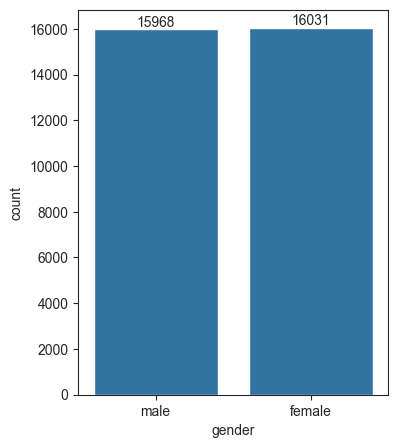

In [83]:
plt.figure(figsize= (4,5))
ax = sns.countplot(x= 'gender', data = train)
ax.bar_label(ax.containers[0])
plt.savefig('gender distribution.jpg')
plt.show()

In [84]:
train.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

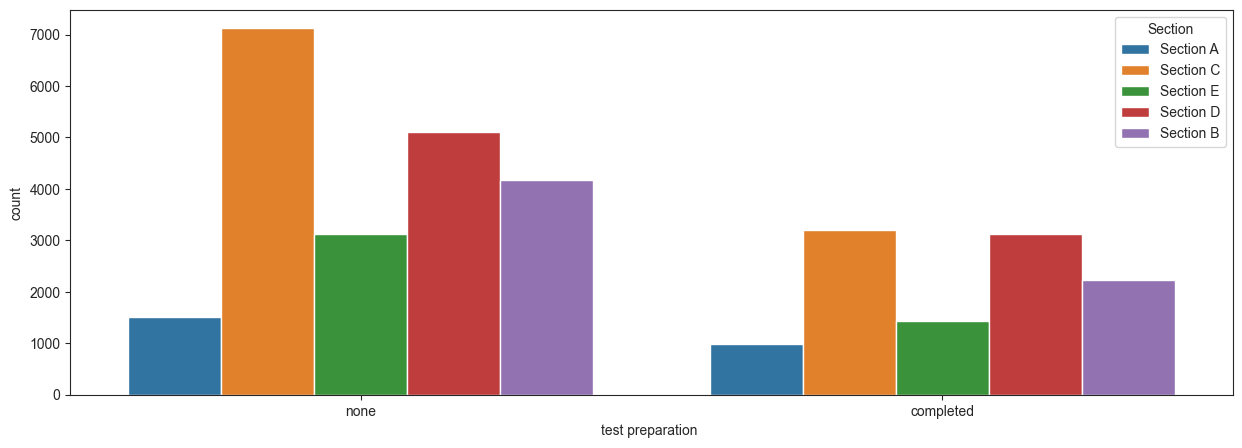

In [85]:
plt.figure(figsize= (15,5))
ax = sns.countplot(x= 'test preparation ', data = train, hue= 'Section')
plt.show()

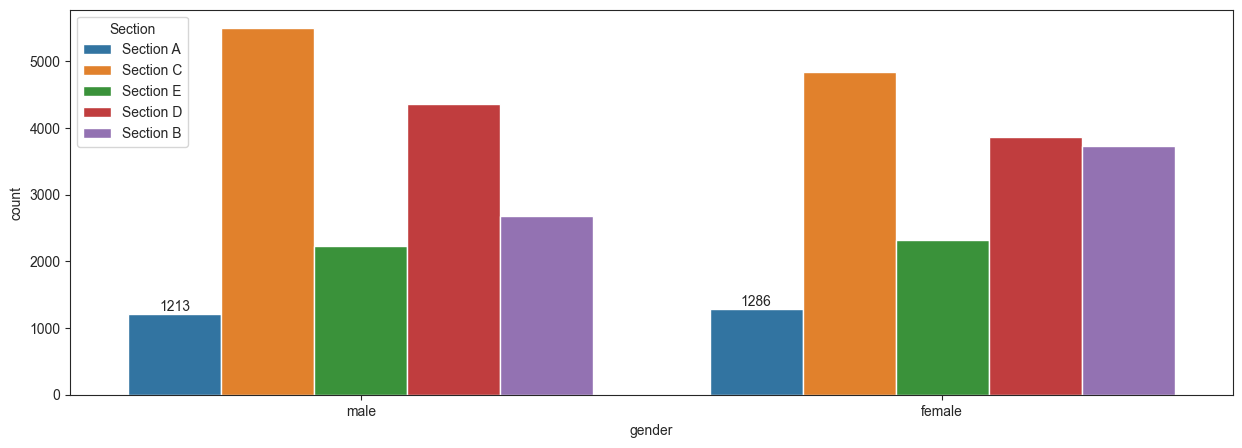

In [86]:
plt.figure(figsize= (15,5))
ax = sns.countplot(x= 'gender', data = train, hue= 'Section')
ax.bar_label(ax.containers[0])
plt.show()

Highest male and female were found in the Section C

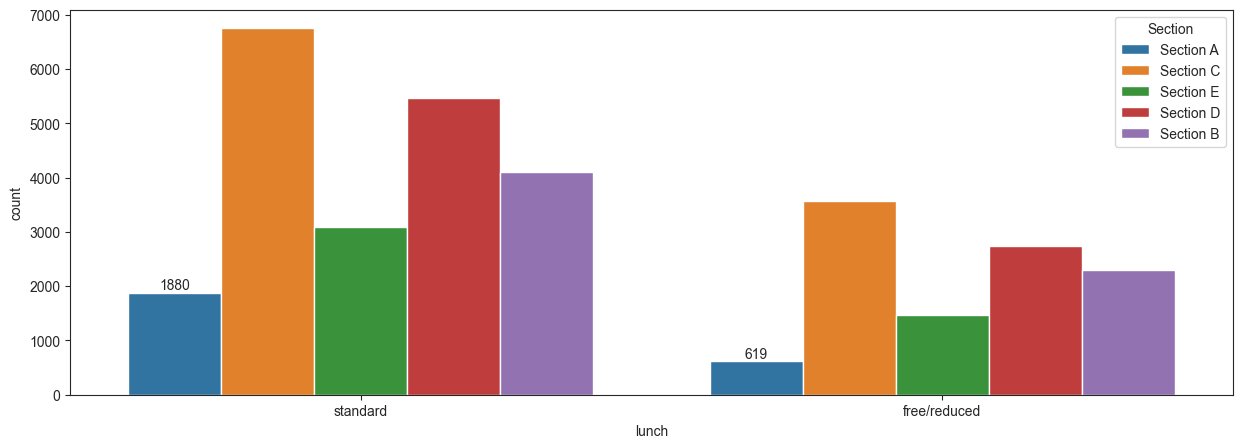

In [87]:
plt.figure(figsize= (15,5))
ax = sns.countplot(x= 'lunch', data = train, hue= 'Section')
ax.bar_label(ax.containers[0])
plt.show()

## Scores By Section

In [217]:
train['total_marks'] = train['practical score'] + train['viva score'] + train['exam score']
train["total_percent"] = round(train['total_marks']/300*100,2)

In [218]:
train.head()

Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  \
0      standard  Section A               70          73          70   
1  free/reduced  Section C               55          54          52   
2  free/reduced  Section E               56          46          43   
3  free/reduced  Section C               35          47          41   
4      standard  Section C               87          92          81   

  practical_qualified viva_qualified exam_qualified  total_marks  \
0                Pass           Pass           Pass          213   
1                Pass           Pass           Pass          161   
2                Pass           Pass           Pass          145   
3                Pass           Pass           Pass          123   
4                Pass           Pass           Pass          260   

   total_percent  
0          71.00  
1          53.67  
2          48.33  
3          41.00  
4          86.67

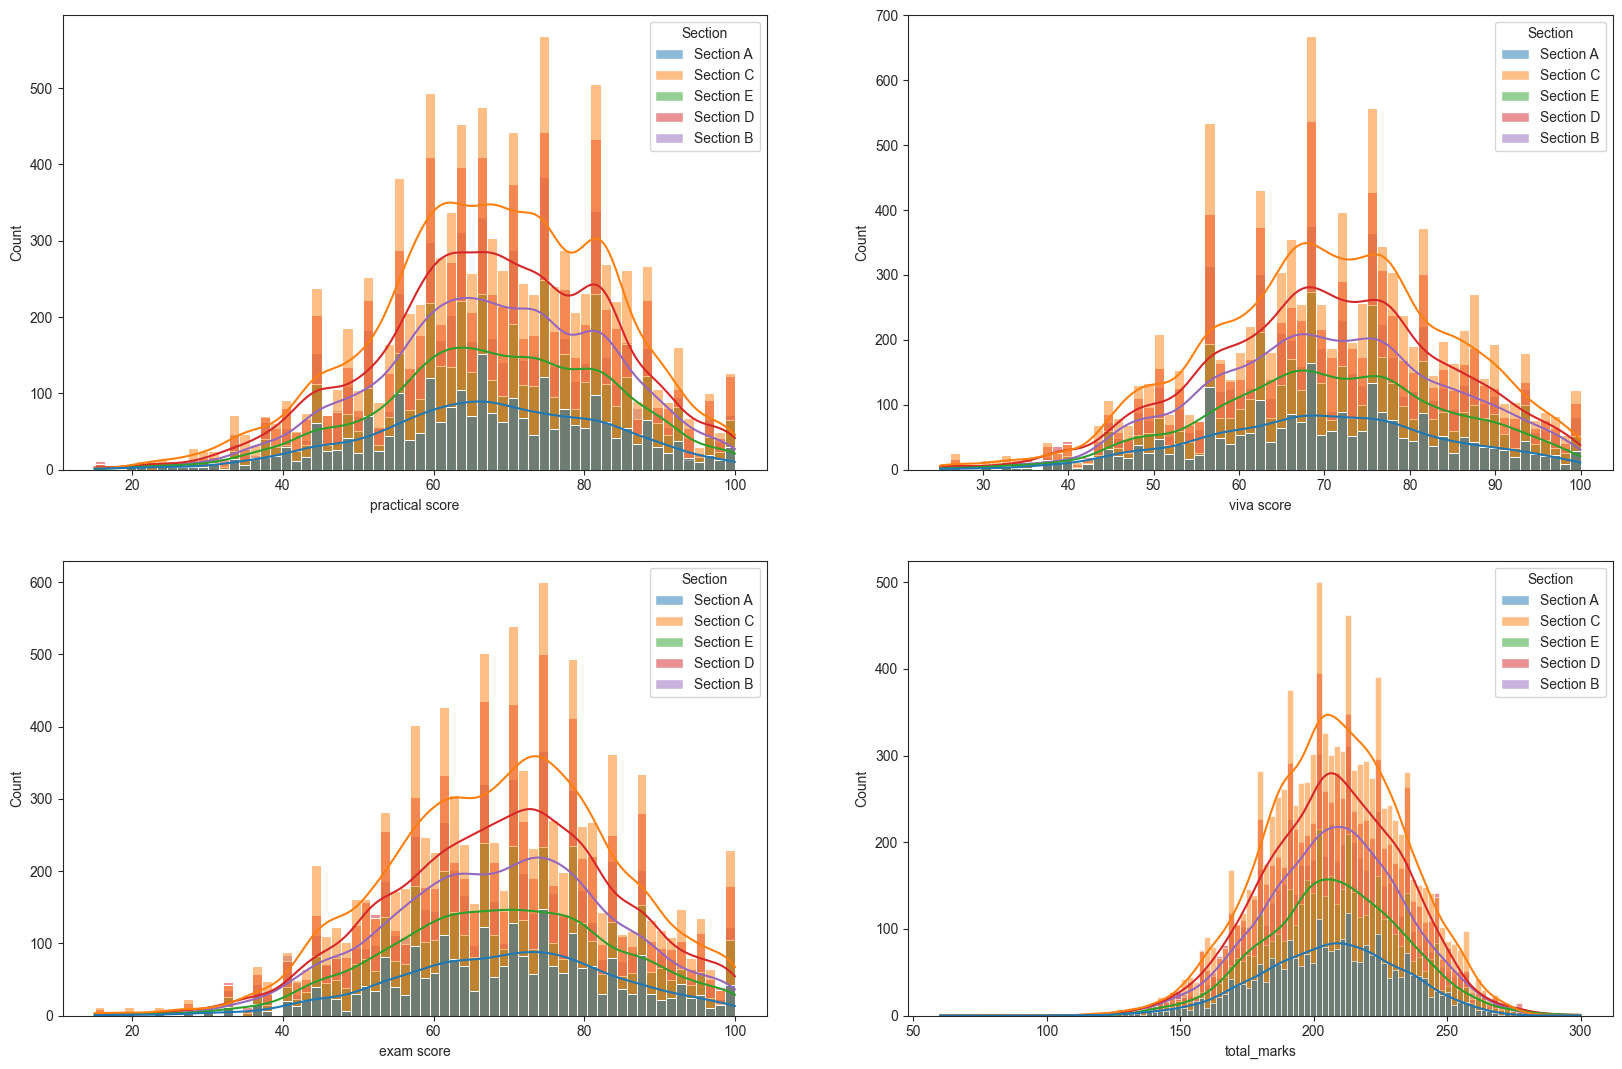

In [219]:
plt.figure(figsize= (20,13))
plt.subplot(2,2,1)
sns.histplot(x= 'practical score', data = train, hue= 'Section', kde=True)
plt.subplot(2,2,2)
sns.histplot(x= 'viva score', data = train, hue= 'Section', kde=True)
plt.subplot(2,2,3)
sns.histplot(x= 'exam score', data = train, hue= 'Section', kde=True)
plt.subplot(2,2,4)
sns.histplot(x= 'total_marks', data = train, hue= 'Section', kde=True)
plt.show()

### In all the Section C scores highest marks in all the types of tests.

## Scores by gender

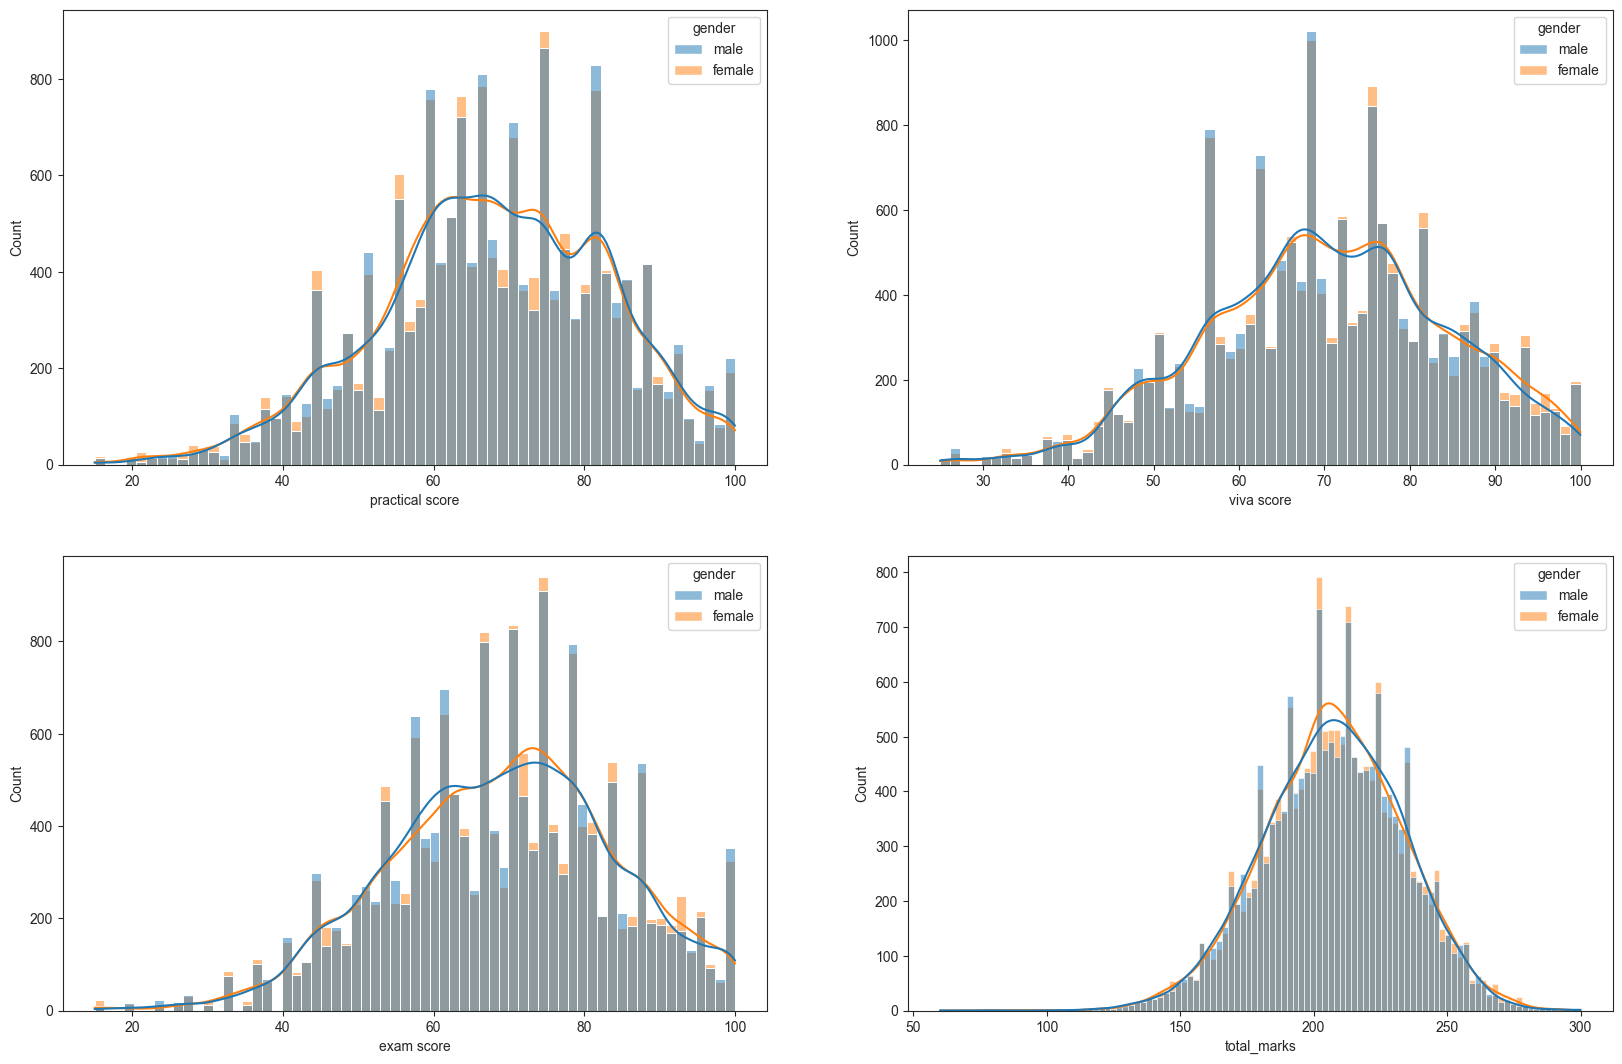

In [220]:
plt.figure(figsize= (20,13))
plt.subplot(2,2,1)
sns.histplot(x= 'practical score', data = train, hue= 'gender', kde=True)
plt.subplot(2,2,2)
sns.histplot(x= 'viva score', data = train, hue= 'gender', kde=True)
plt.subplot(2,2,3)
sns.histplot(x= 'exam score', data = train, hue= 'gender', kde=True)
plt.subplot(2,2,4)
sns.histplot(x= 'total_marks', data = train, hue= 'gender', kde=True)
plt.show()

1.  Among the three types of scores the female were leading in viva scoring max number of 100% then that of the male population.
2. Remaining two types of scores male population is leading.

## Pass Percentage

In [221]:
train['practical_qualified'] = train['practical score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')
train['viva_qualified'] = train['viva score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')
train['exam_qualified'] = train['exam score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')
train.head()

Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  \
0      standard  Section A               70          73          70   
1  free/reduced  Section C               55          54          52   
2  free/reduced  Section E               56          46          43   
3  free/reduced  Section C               35          47          41   
4      standard  Section C               87          92          81   

  practical_qualified viva_qualified exam_qualified  total_marks  \
0                Pass           Pass           Pass          213   
1                Pass           Pass           Pass          161   
2                Pass           Pass           Pass          145   
3                Fail           Pass           Pass          123   
4                Pass           Pass           Pass          260   

   total_percent  
0          71.00  
1          53.67  
2          48.33  
3          41.00  
4          86.67

In [162]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%  \n({v:d})'.format(p=pct, v=val)
    return my_autopct

## Gender wise

(-1.25, 1.25, -1.25, 1.25)

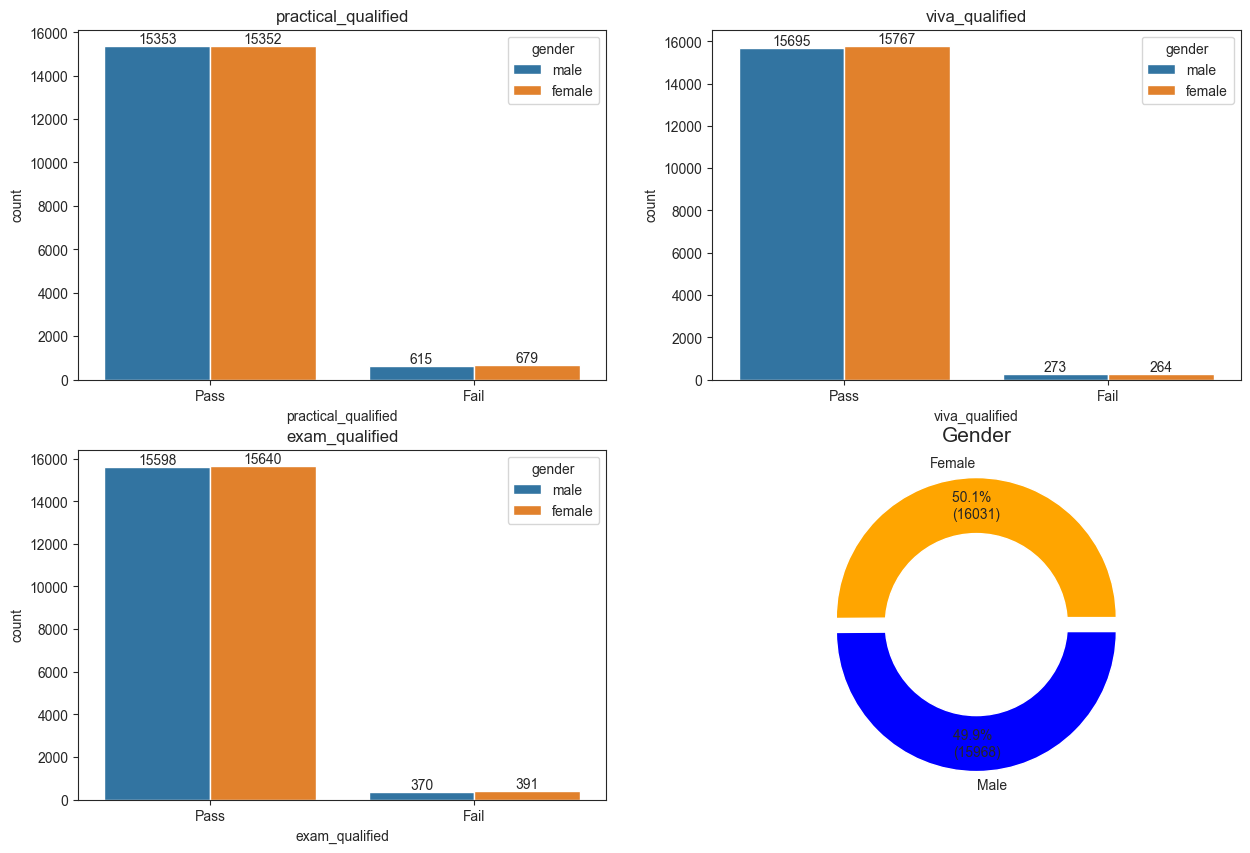

In [222]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'practical_qualified', data = train, hue= 'gender')
for container in ax.containers:
    ax.bar_label(container)
plt.title('practical_qualified') 

plt.subplot(2,2,2)
bx = sns.countplot(x= 'viva_qualified', data = train, hue= 'gender')
for container in bx.containers:
    bx.bar_label(container)
plt.title('viva_qualified')    

plt.subplot(2,2,3)
cx = sns.countplot(x= 'exam_qualified', data = train, hue= 'gender')
for container in cx.containers:
    cx.bar_label(container)
plt.title('exam_qualified')
plt.savefig('Pass_by_gender.jpg')

plt.subplot(2, 2, 4)
size = train['gender'].value_counts()
labels = 'Female', 'Male'
color = ['orange','blue']
plt.pie(size, colors=color, labels=labels, autopct= make_autopct(train['gender'].value_counts()), pctdistance=0.8,explode=[0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Gender', fontsize=15)
plt.axis('off')

# Lunch Provided

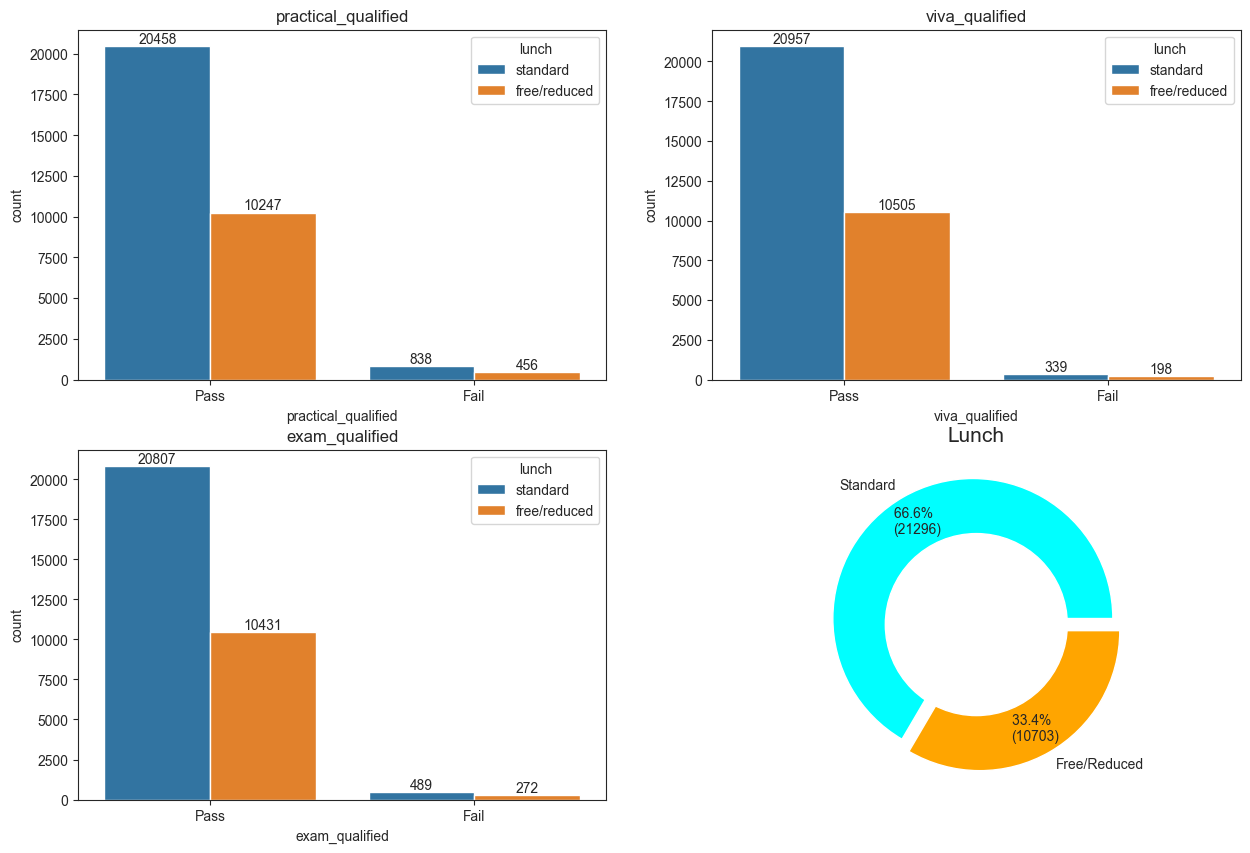

In [224]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'practical_qualified', data = train, hue= 'lunch')
for container in ax.containers:
    ax.bar_label(container)
plt.title('practical_qualified') 

plt.subplot(2,2,2)
bx = sns.countplot(x= 'viva_qualified', data = train, hue= 'lunch')
for container in bx.containers:
    bx.bar_label(container)
plt.title('viva_qualified')   
 
plt.subplot(2,2,3)
cx = sns.countplot(x= 'exam_qualified', data = train, hue= 'lunch')
for container in cx.containers:
    cx.bar_label(container)
plt.title('exam_qualified')

plt.subplot(2, 2, 4)
size = train['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct= make_autopct(train['lunch'].value_counts()), pctdistance=0.8, explode=[0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Lunch', fontsize=15)
plt.axis('off')



plt.savefig('Pass_by_lunch.jpg')

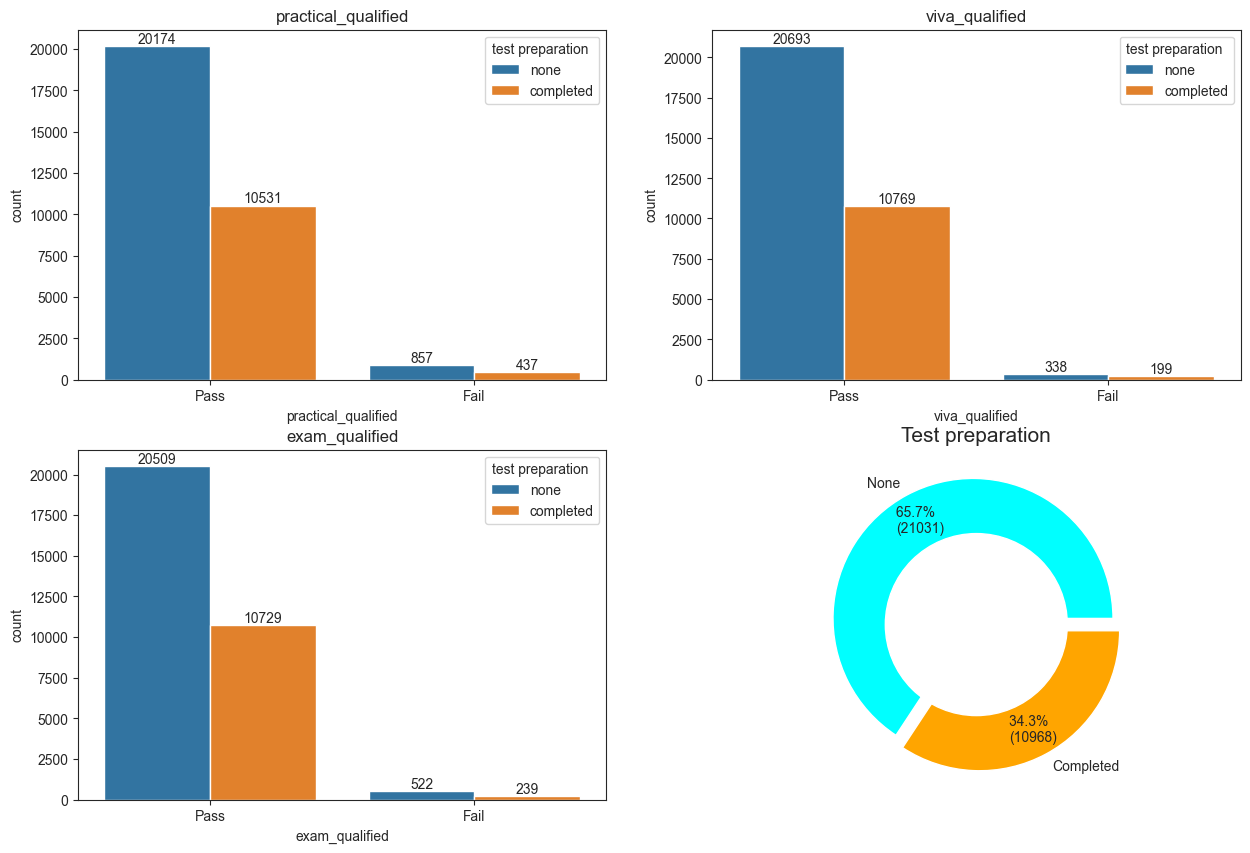

In [225]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'practical_qualified', data = train, hue= 'test preparation ')
for container in ax.containers:
    ax.bar_label(container)
plt.title('practical_qualified') 

plt.subplot(2,2,2)
bx = sns.countplot(x= 'viva_qualified', data = train, hue= 'test preparation ')
for container in bx.containers:
    bx.bar_label(container)
plt.title('viva_qualified')   
 
plt.subplot(2,2,3)
cx = sns.countplot(x= 'exam_qualified', data = train, hue= 'test preparation ')
for container in cx.containers:
    cx.bar_label(container)
plt.title('exam_qualified')

plt.subplot(2, 2, 4)
size = train['test preparation '].value_counts()
labels = 'None', 'Completed'
color = ['cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct = make_autopct(train['test preparation '].value_counts()), pctdistance=0.8,explode=[0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Test preparation', fontsize=15)
plt.axis('off')

plt.savefig('Pass_by_test.jpg')

In [140]:
train.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score',
       'practical_qualified', 'viva_qualified', 'exam_qualified'],
      dtype='object')

## Section wise pass percent

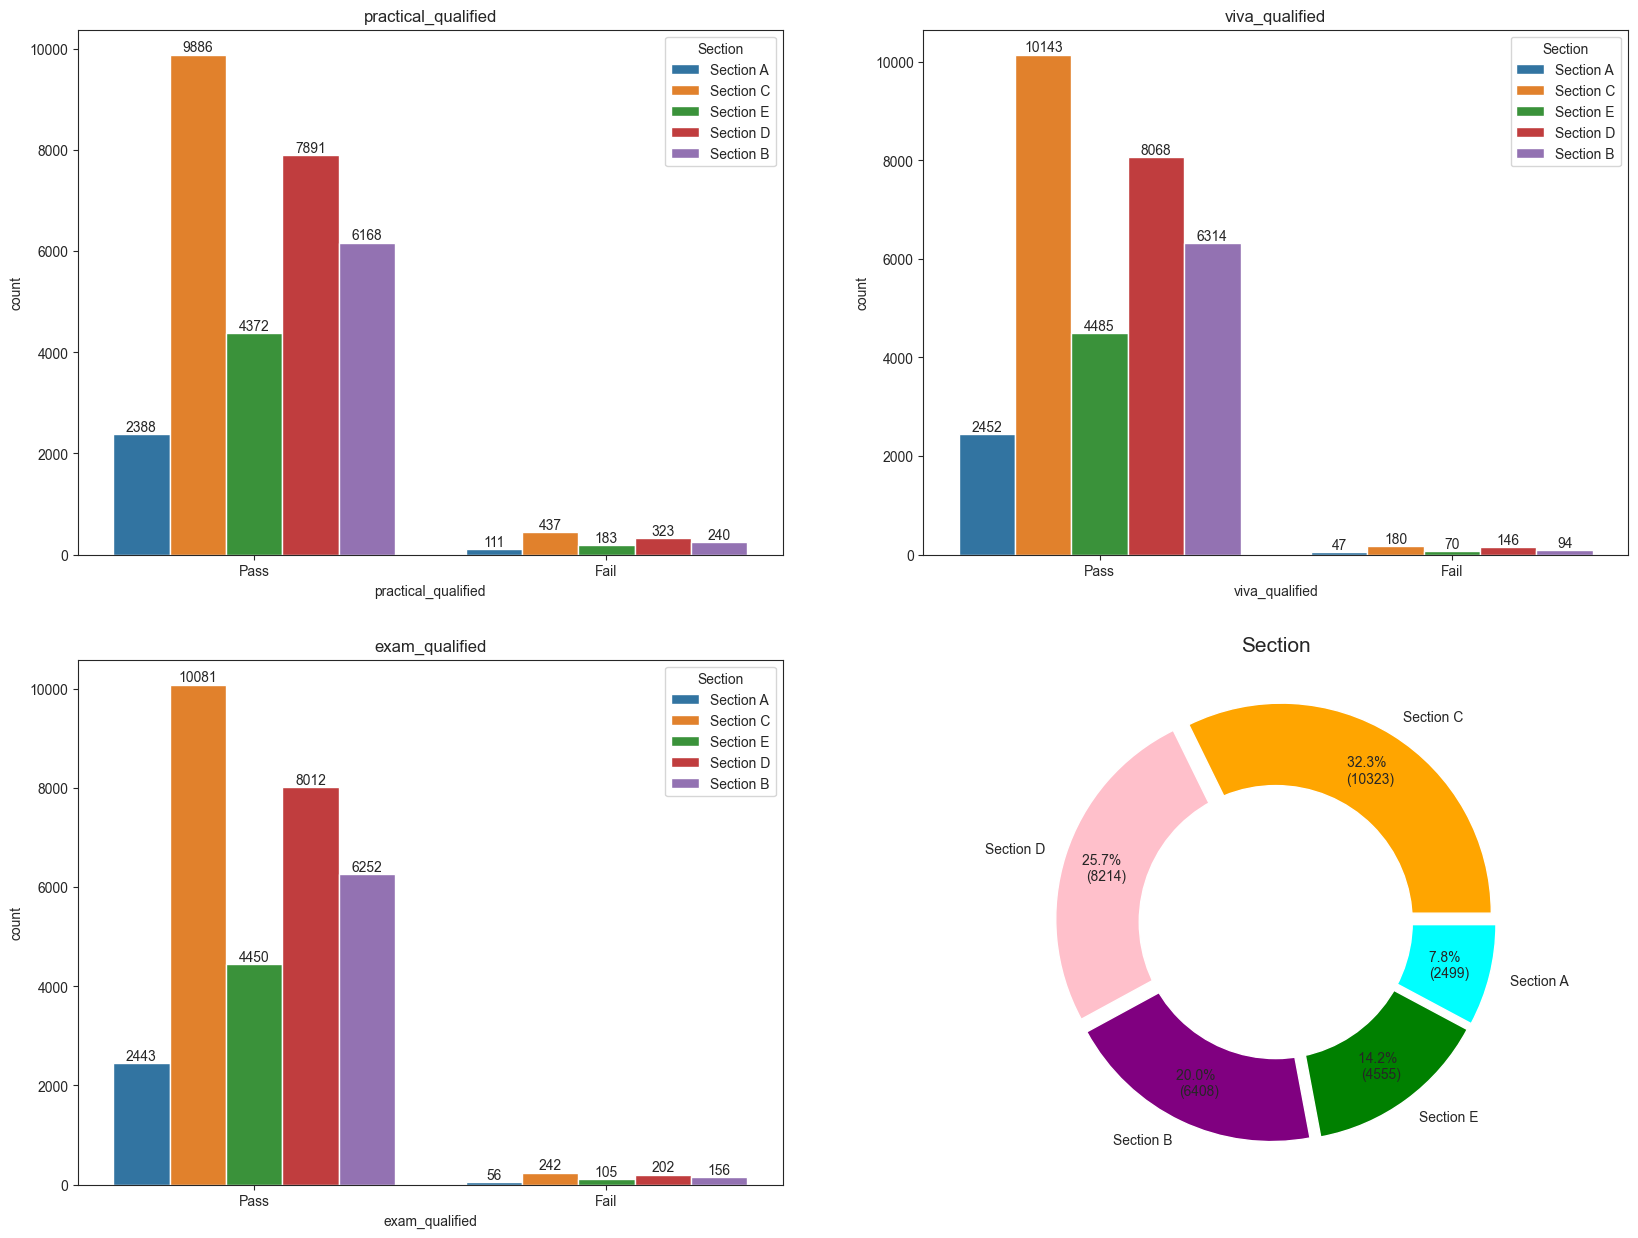

In [226]:
plt.figure(figsize= (20,15))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'practical_qualified', data = train, hue= 'Section')
for container in ax.containers:
    ax.bar_label(container)
plt.title('practical_qualified') 

plt.subplot(2,2,2)
bx = sns.countplot(x= 'viva_qualified', data = train, hue= 'Section')
for container in bx.containers:
    bx.bar_label(container)
plt.title('viva_qualified')    
plt.subplot(2,2,3)
cx = sns.countplot(x= 'exam_qualified', data = train, hue= 'Section')
for container in cx.containers:
    cx.bar_label(container)
plt.title('exam_qualified')

plt.subplot(2,2,4)
size = train['Section'].value_counts()
labels = 'Section C', 'Section D', 'Section B', 'Section E', 'Section A'
color = ['orange', 'pink', 'purple', 'green', 'cyan']
plt.pie(size, colors=color, labels=labels, autopct = make_autopct(train['Section'].value_counts()), pctdistance=0.8, explode=[0.05, 0.05, 0.05, 0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Section', fontsize=15)
plt.axis('off')

plt.savefig('Pass_by_section.jpg')

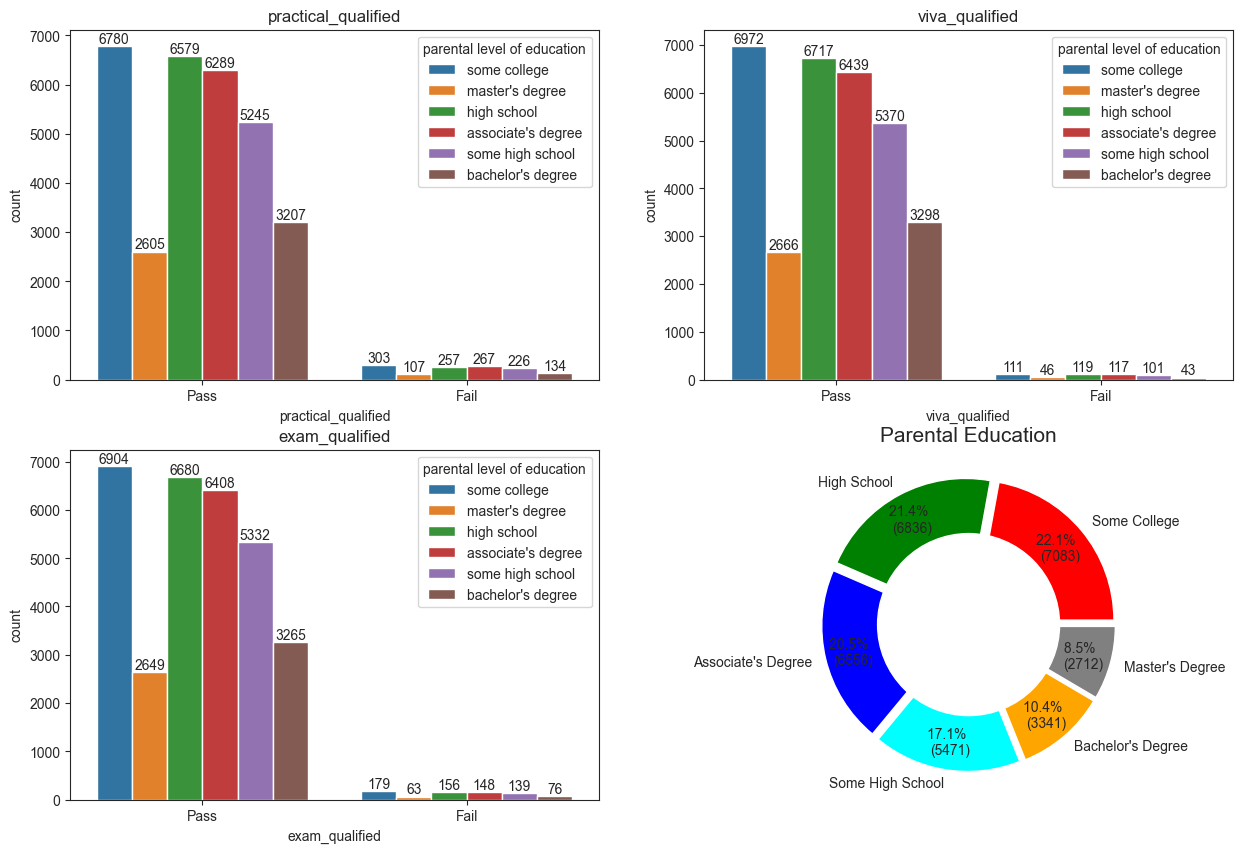

In [227]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'practical_qualified', data = train, hue= 'parental level of education')
for container in ax.containers:
    ax.bar_label(container)
plt.title('practical_qualified') 

plt.subplot(2,2,2)
bx = sns.countplot(x= 'viva_qualified', data = train, hue= 'parental level of education')
for container in bx.containers:
    bx.bar_label(container)
plt.title('viva_qualified')   
 
plt.subplot(2,2,3)
cx = sns.countplot(x= 'exam_qualified', data = train, hue= 'parental level of education')
for container in cx.containers:
    cx.bar_label(container)
plt.title('exam_qualified')


plt.subplot(2, 2, 4)
size = train['parental level of education'].value_counts()
labels = 'Some College', 'High School', "Associate's Degree", 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels,  autopct = make_autopct(train['parental level of education'].value_counts()), pctdistance=0.8,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Parental Education', fontsize=15)
plt.axis('off')

plt.savefig('Pass_by_parent.jpg')

In [249]:
train.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score',
       'practical_qualified', 'viva_qualified', 'exam_qualified',
       'total_marks', 'total_percent', 'Overall Pass'],
      dtype='object')

In [228]:
train['Overall Pass'] = train[['practical score', 'viva score', 'exam score']].apply(lambda x: 'Pass' if all(x >= 40) else 'Fail', axis=1)

(-1.25, 1.25, -1.25, 1.25)

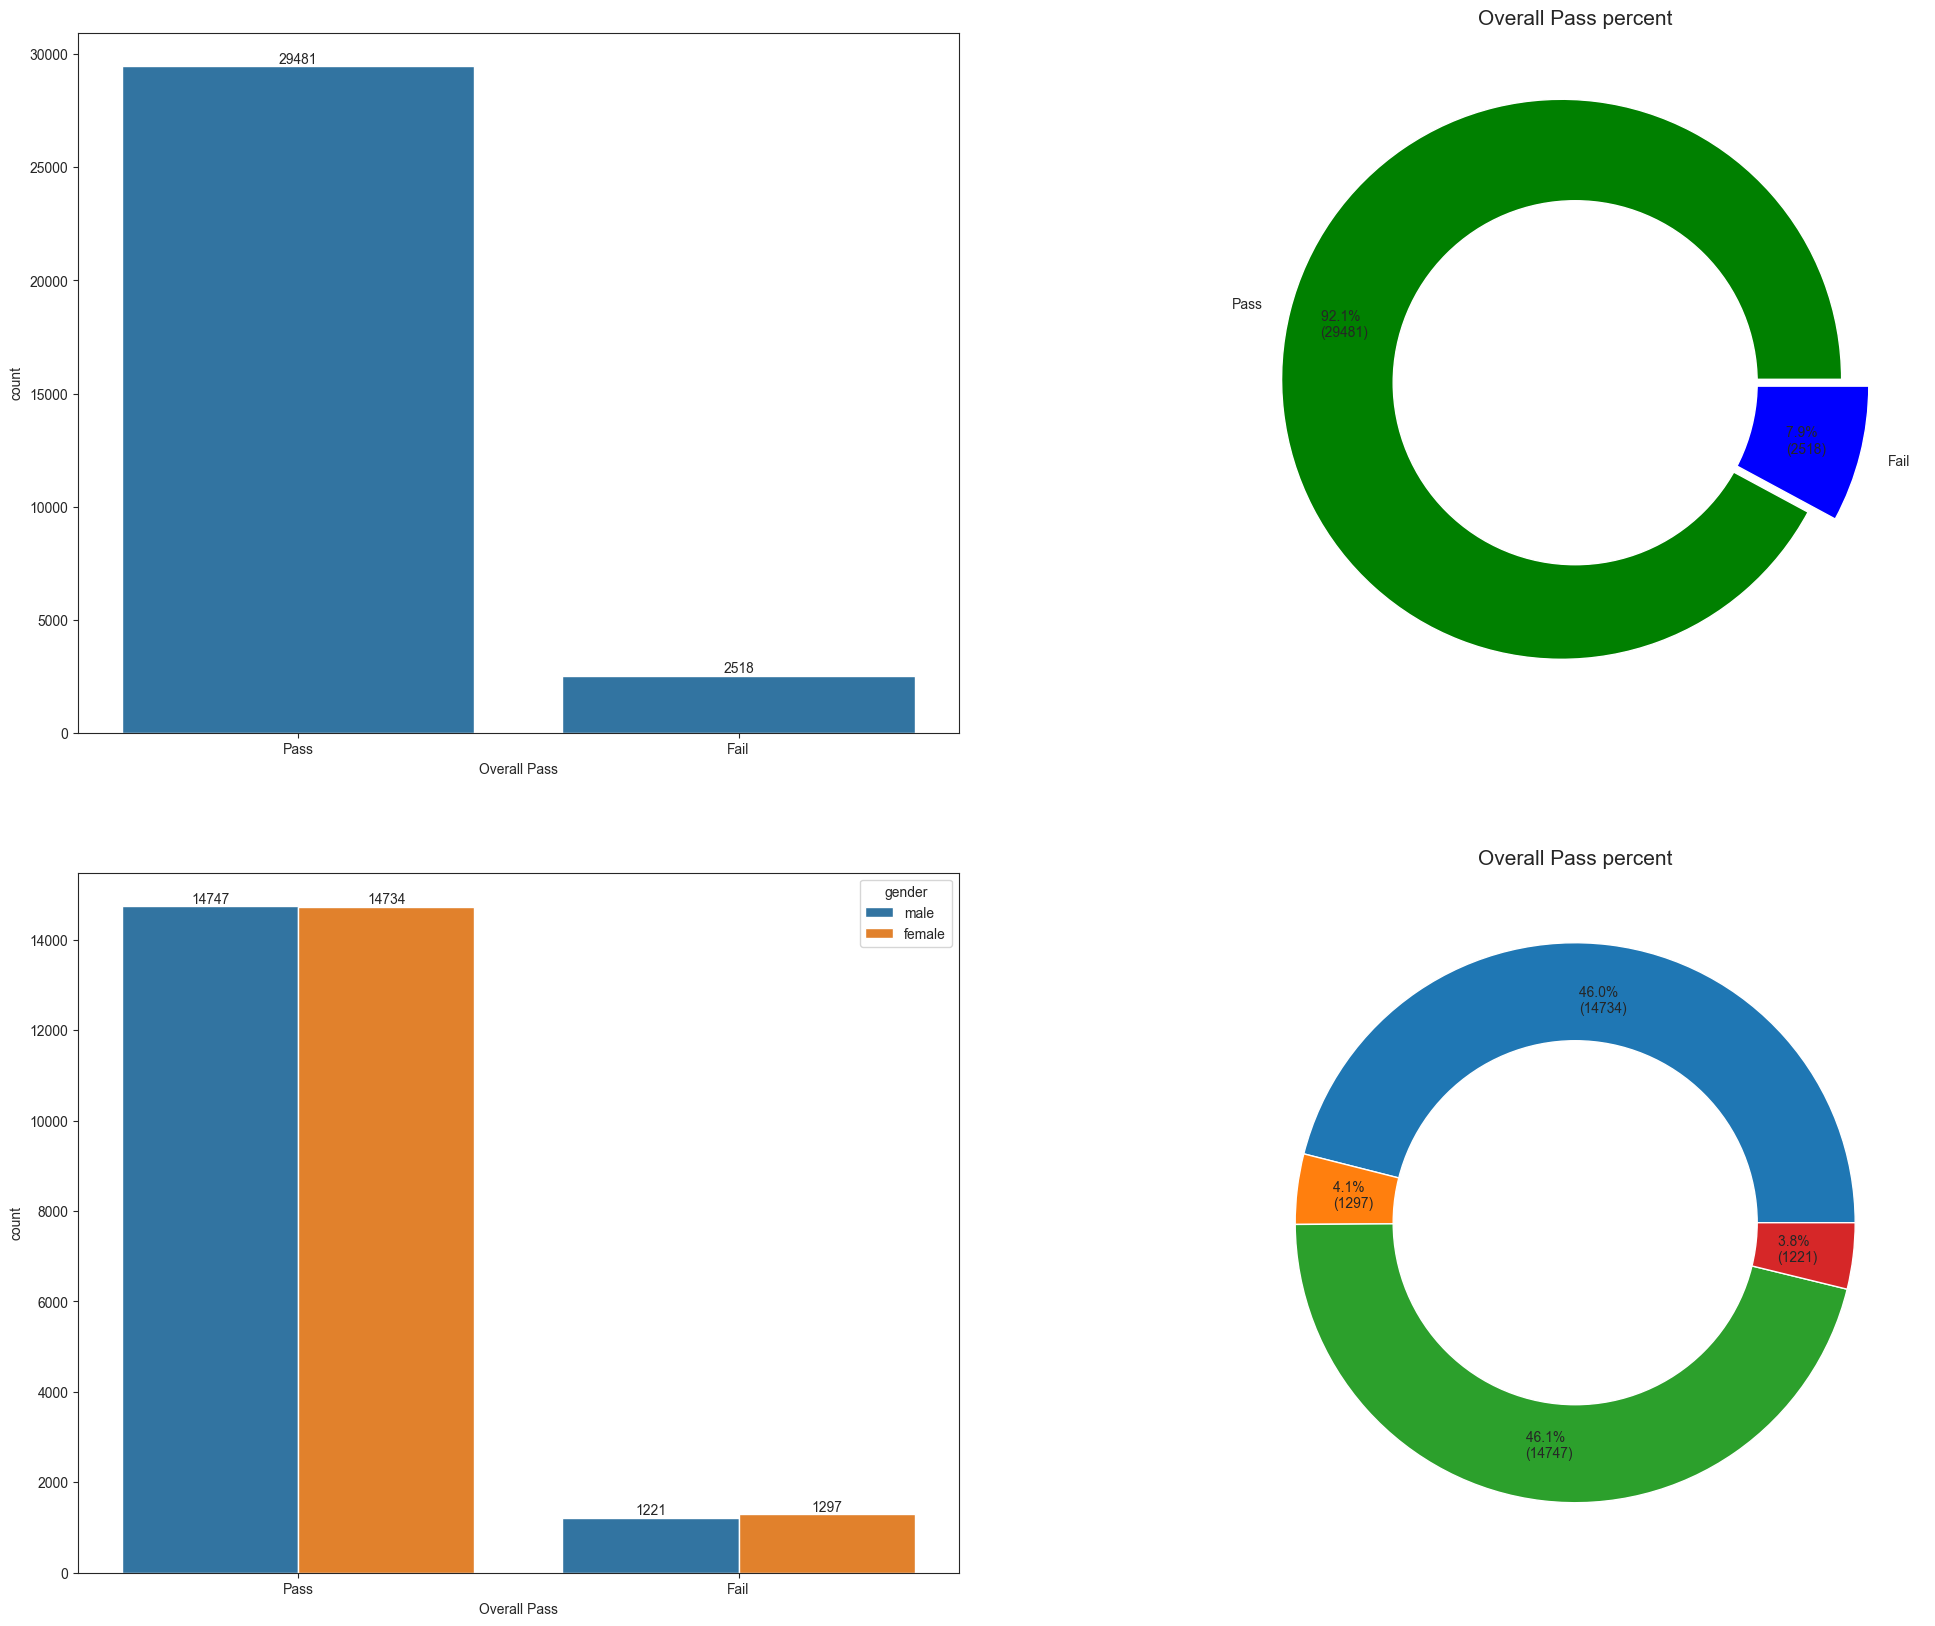

In [259]:
plt.figure(figsize= (25,20))

plt.subplot(2,2,1)
ax = sns.countplot(x= 'Overall Pass', data = train)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(2,2,2)
size = train['Overall Pass'].value_counts()
labels  = "Pass", "Fail"
color = ['green', 'blue']
plt.pie(size, colors=color, labels=labels,  autopct = make_autopct(train['Overall Pass'].value_counts()), pctdistance=0.8,explode=[0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Overall Pass percent', fontsize=15)
plt.axis('off')

plt.subplot(2,2,3)
ax = sns.countplot(x= 'Overall Pass', data = train, hue= 'gender')
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(2,2,4)
size = train.groupby('gender')['Overall Pass'].value_counts()
plt.pie(size, autopct = make_autopct(train.groupby('gender')['Overall Pass'].value_counts()), pctdistance=0.8)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Overall Pass percent', fontsize=15)
plt.axis('off')


(-1.25, 1.25, -1.25, 1.25)

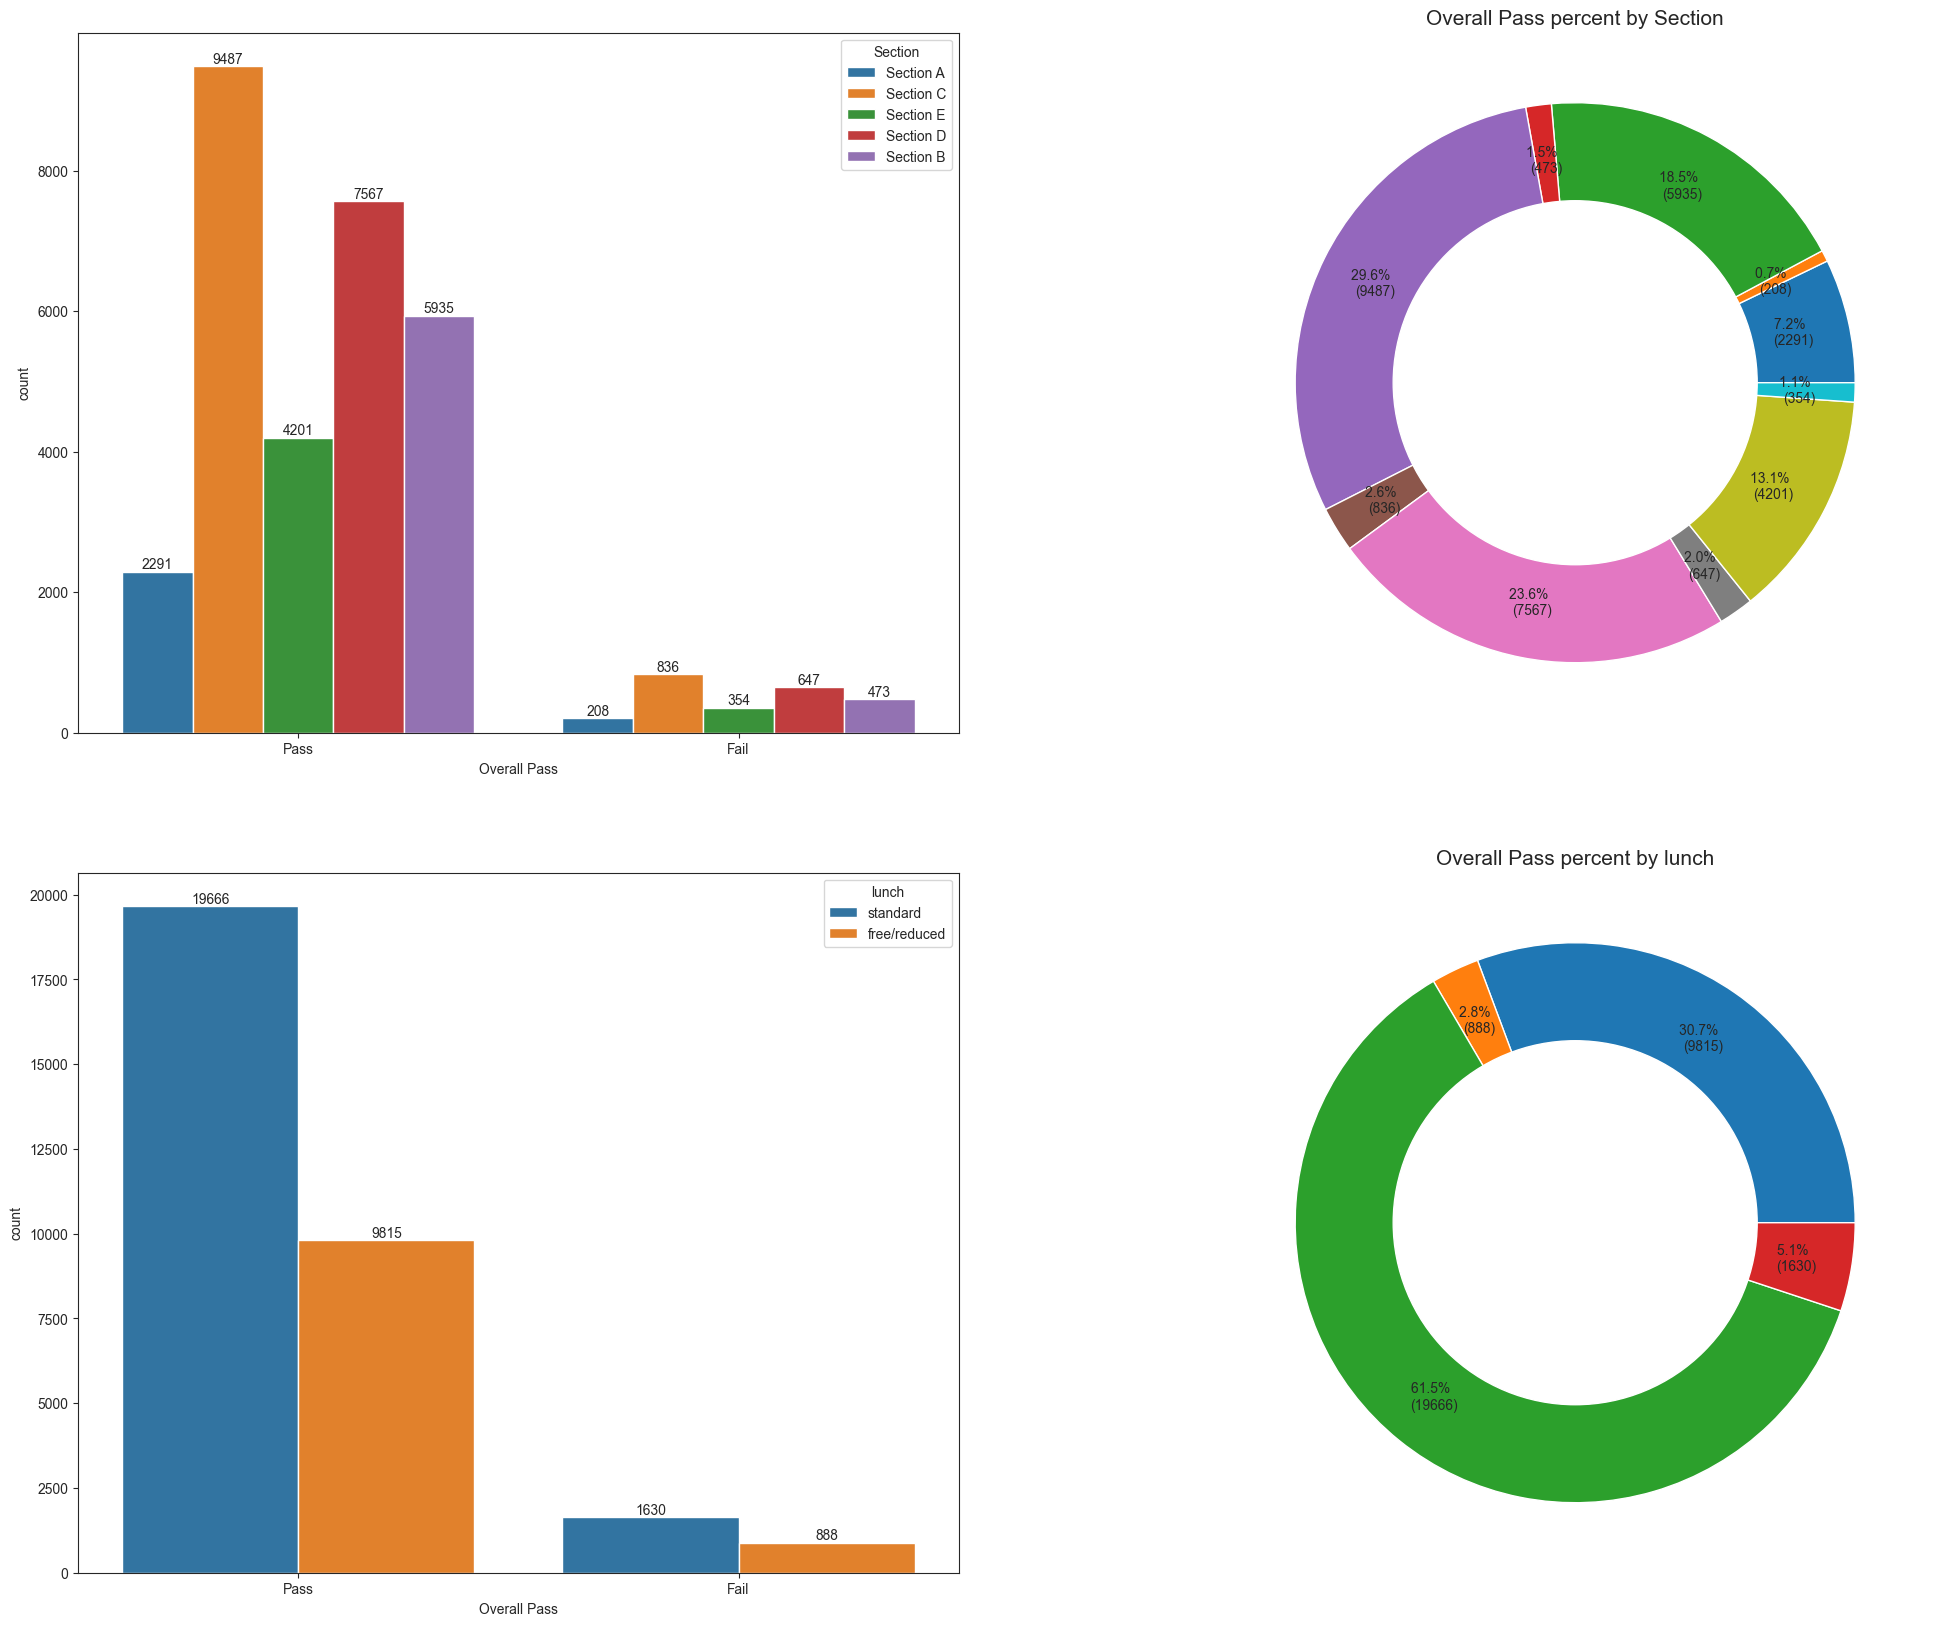

In [258]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
ax = sns.countplot(x= 'Overall Pass', data = train, hue= 'Section')
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(2,2,2)
size = train.groupby('Section')['Overall Pass'].value_counts()
plt.pie(size, autopct = make_autopct(train.groupby('Section')['Overall Pass'].value_counts()), pctdistance=0.8)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Overall Pass percent by Section', fontsize=15)
plt.axis('off')

plt.subplot(2,2,3)
ax = sns.countplot(x= 'Overall Pass', data = train, hue= 'lunch')
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(2,2,4)
size = train.groupby('lunch')['Overall Pass'].value_counts()
plt.pie(size, autopct = make_autopct(train.groupby('lunch')['Overall Pass'].value_counts()), pctdistance=0.8)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Overall Pass percent by lunch', fontsize=15)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

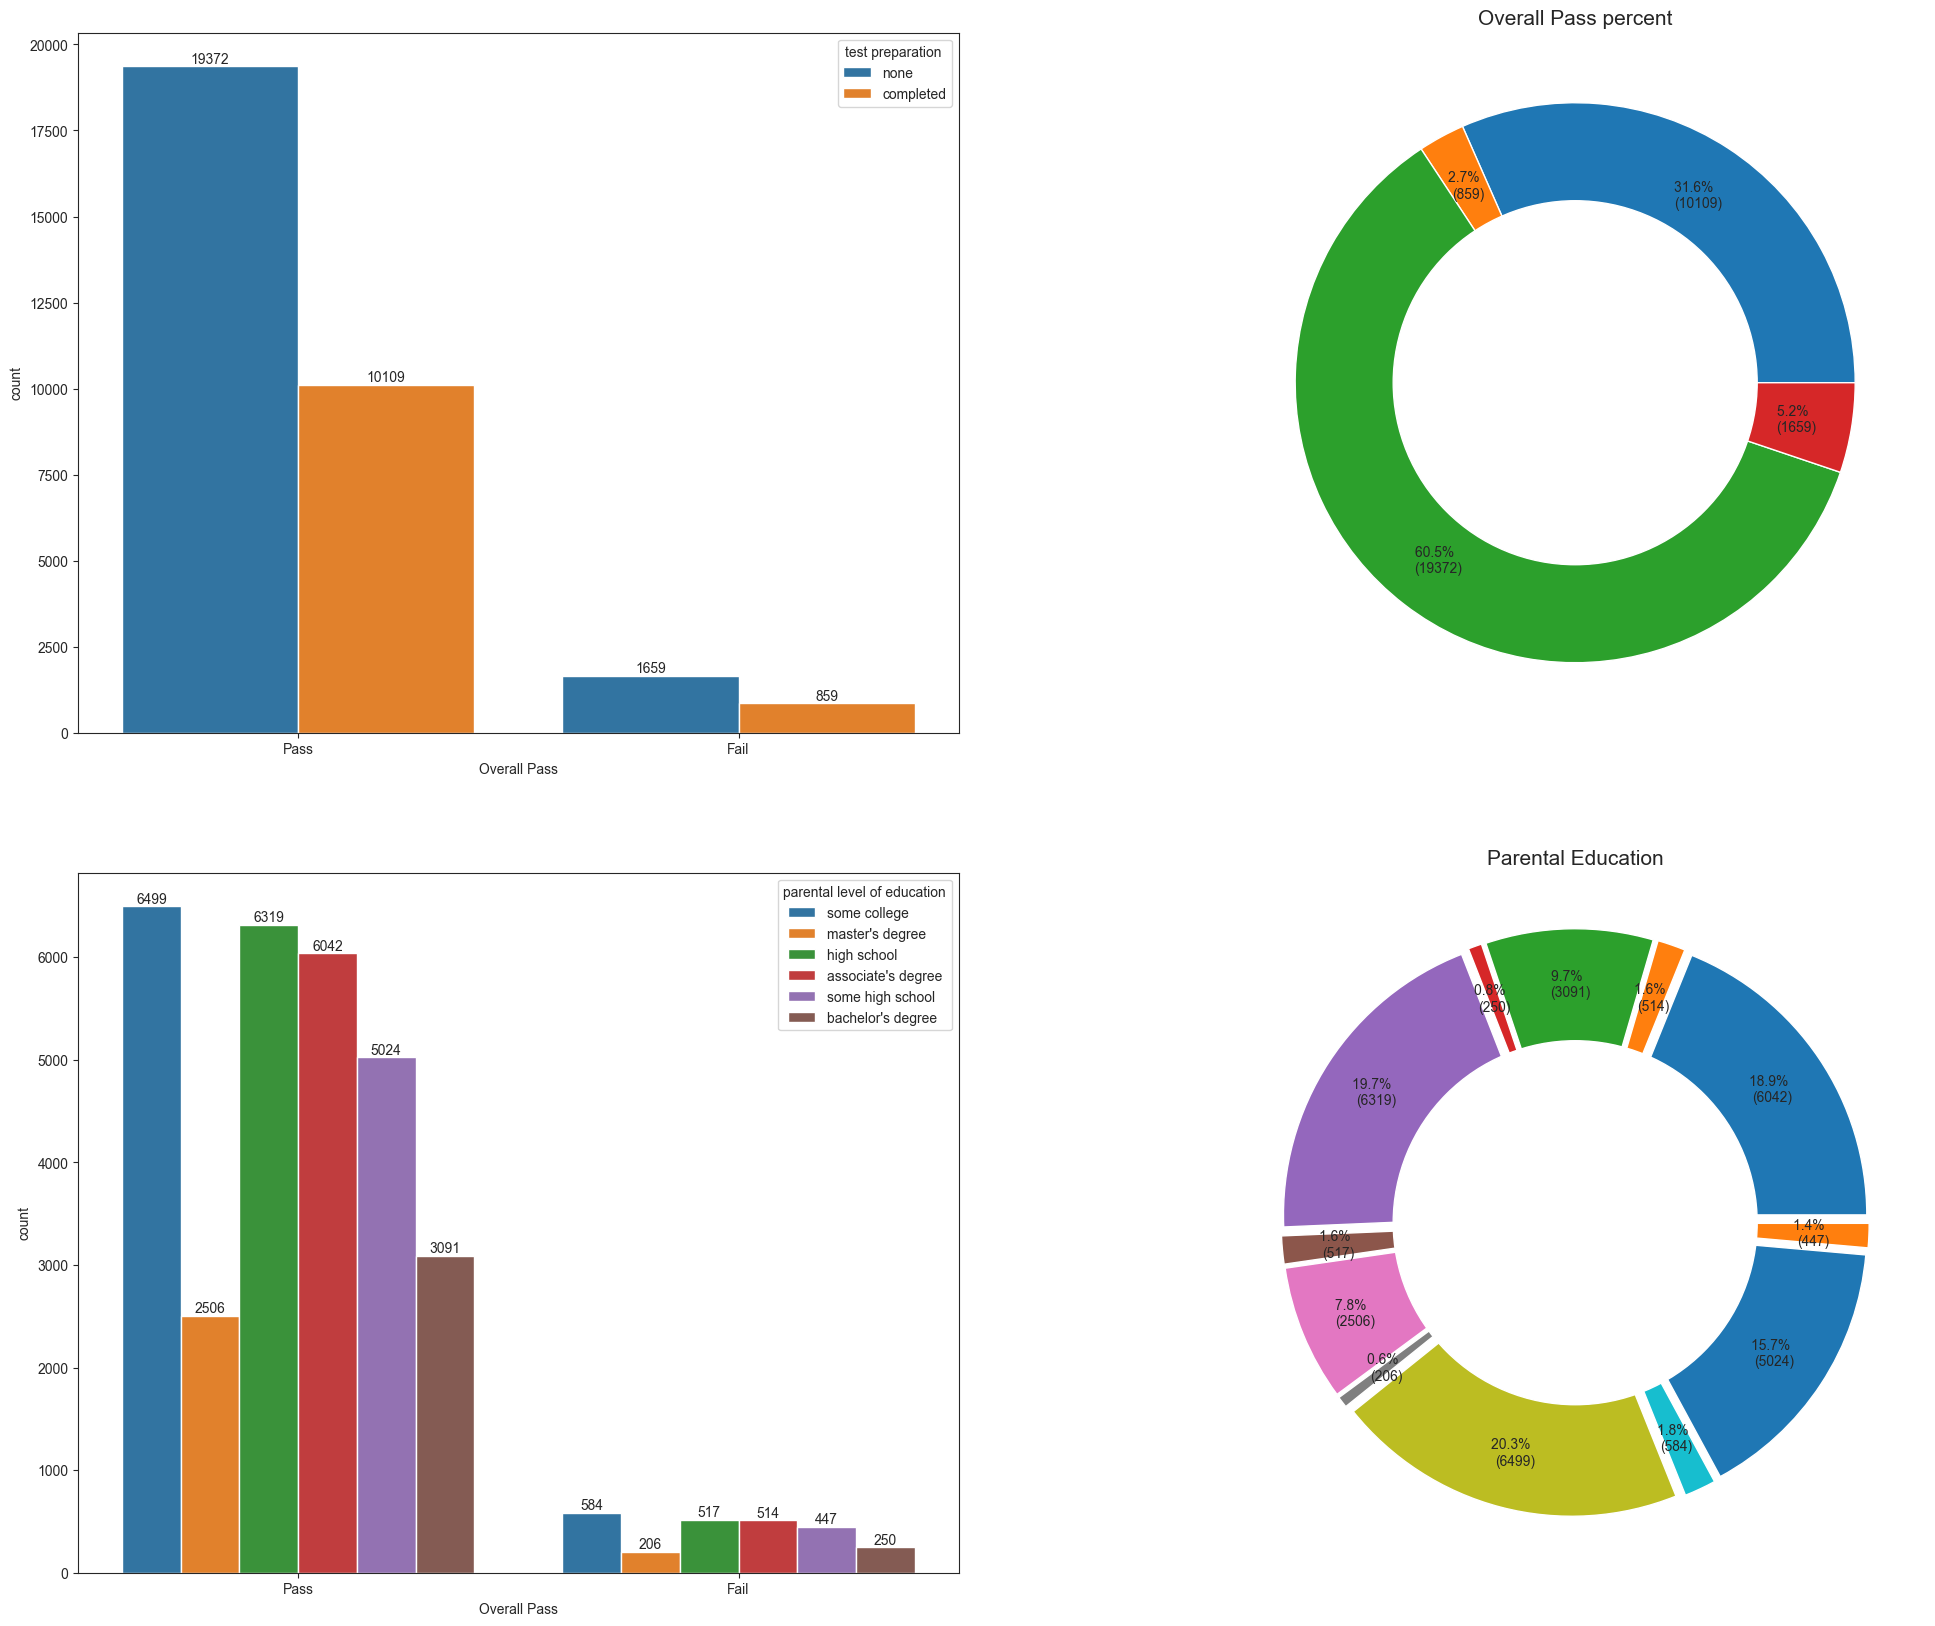

In [260]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
ax = sns.countplot(x= 'Overall Pass', data = train, hue= 'test preparation ')
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(2,2,2)
size = train.groupby('test preparation ')['Overall Pass'].value_counts()
plt.pie(size, autopct = make_autopct(train.groupby('test preparation ')['Overall Pass'].value_counts()), pctdistance=0.8)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Overall Pass percent', fontsize=15)
plt.axis('off')

plt.subplot(2,2,3)
ax = sns.countplot(x= 'Overall Pass', data = train, hue= 'parental level of education')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(2,2,4)
size = train.groupby('parental level of education')['Overall Pass'].value_counts()
plt.pie(size, autopct = make_autopct(train.groupby('parental level of education')['Overall Pass'].value_counts()), pctdistance=0.8,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Parental Education', fontsize=15)
plt.axis('off')

## Gender wise Heatmap

In [98]:
gender = train.groupby('gender').agg({"practical score":'mean',"viva score":'mean',"exam score":'mean'})

practical score  viva score  exam score
gender                                         
female        67.658911   70.541513   69.255692
male          68.021543   70.208166   69.023046

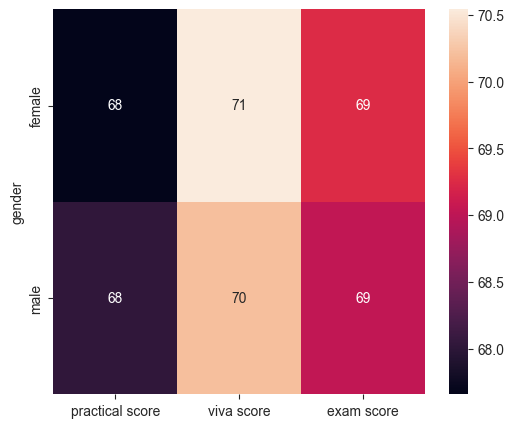

In [198]:
plt.figure(figsize= (6,5))
sns.heatmap(gender, annot= True)
plt.show()

# Test Preparation

In [100]:
test = train.groupby('test preparation ').agg({"practical score":'mean',"viva score":'mean',"exam score":'mean'})

practical score  viva score  exam score
test preparation                                          
completed                67.737236   70.435722   69.274435
none                     67.893395   70.343588   69.069279

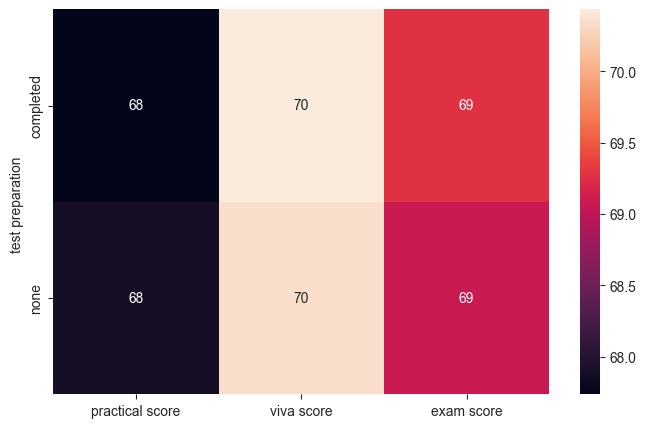

In [101]:
plt.figure(figsize= (8,5))
sns.heatmap(test, annot= True)
plt.show()

## Parent Education wise heat map

In [102]:
parent = train.groupby('parental level of education').agg({"practical score":'mean',"viva score":'mean',"exam score":'mean'})
parent

practical score  viva score  exam score
parental level of education                                         
associate's degree                 68.002898   70.309335   69.383923
bachelor's degree                  68.152350   70.473511   69.226579
high school                        67.843329   70.793593   69.205822
master's degree                    67.748156   70.141593   68.851770
some college                       67.553155   70.285896   69.150501
some high school                   67.866021   70.102541   68.839517

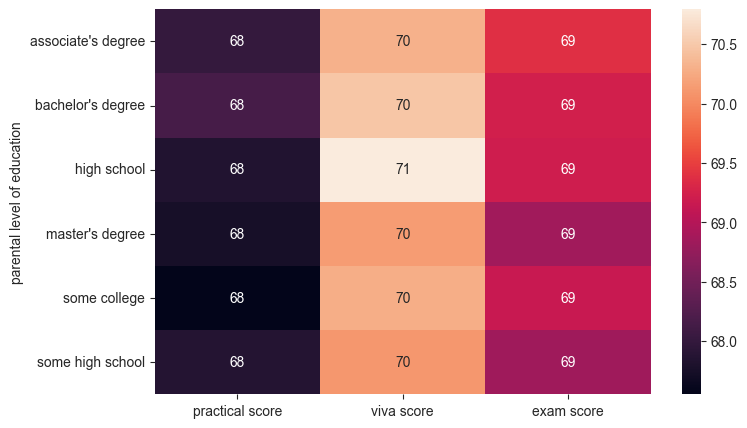

In [103]:
plt.figure(figsize= (8,5))
sns.heatmap(parent, annot= True)
plt.show()

## Provided Lunch wise Heat map

In [136]:
lunch = train.groupby('lunch').agg({"practical score":'mean',"viva score":'mean',"exam score":'mean'})

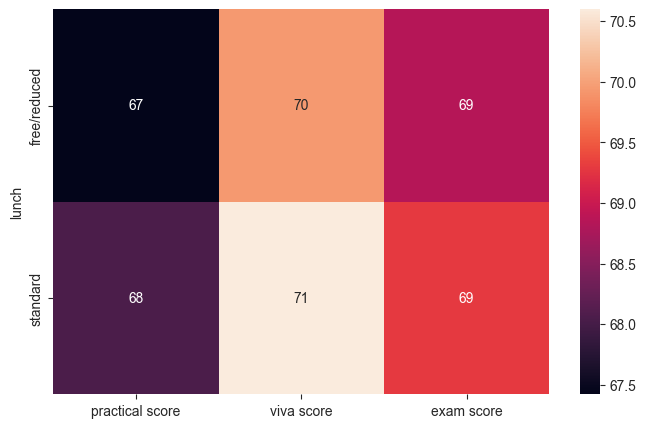

In [105]:
plt.figure(figsize= (8,5))
sns.heatmap(lunch, annot= True)
plt.show()

# Section wise heat map

In [137]:
section= train.groupby('Section').agg({"practical score":'mean',"viva score":'mean',"exam score":'mean'})

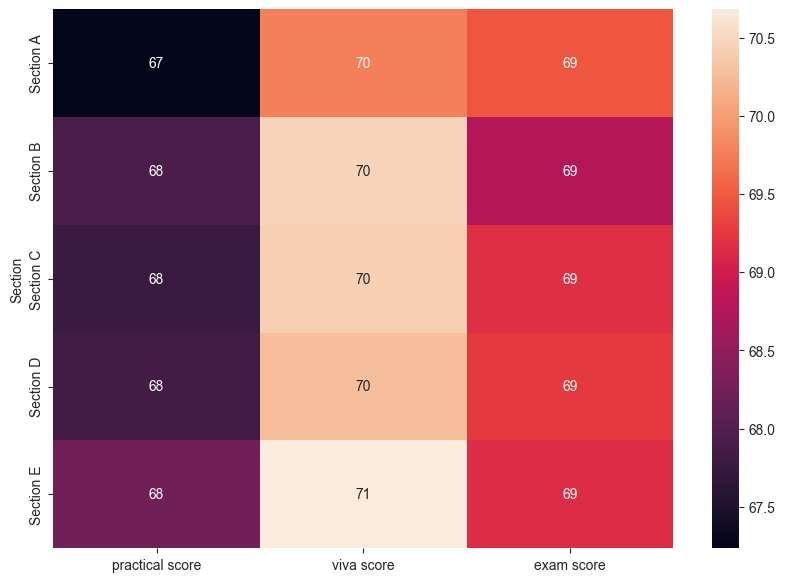

In [107]:
plt.figure(figsize= (10,7))
sns.heatmap(section, annot= True)
plt.show()

## Over All image for Heat maps

Text(0.5, 1.0, 'Impact by section')

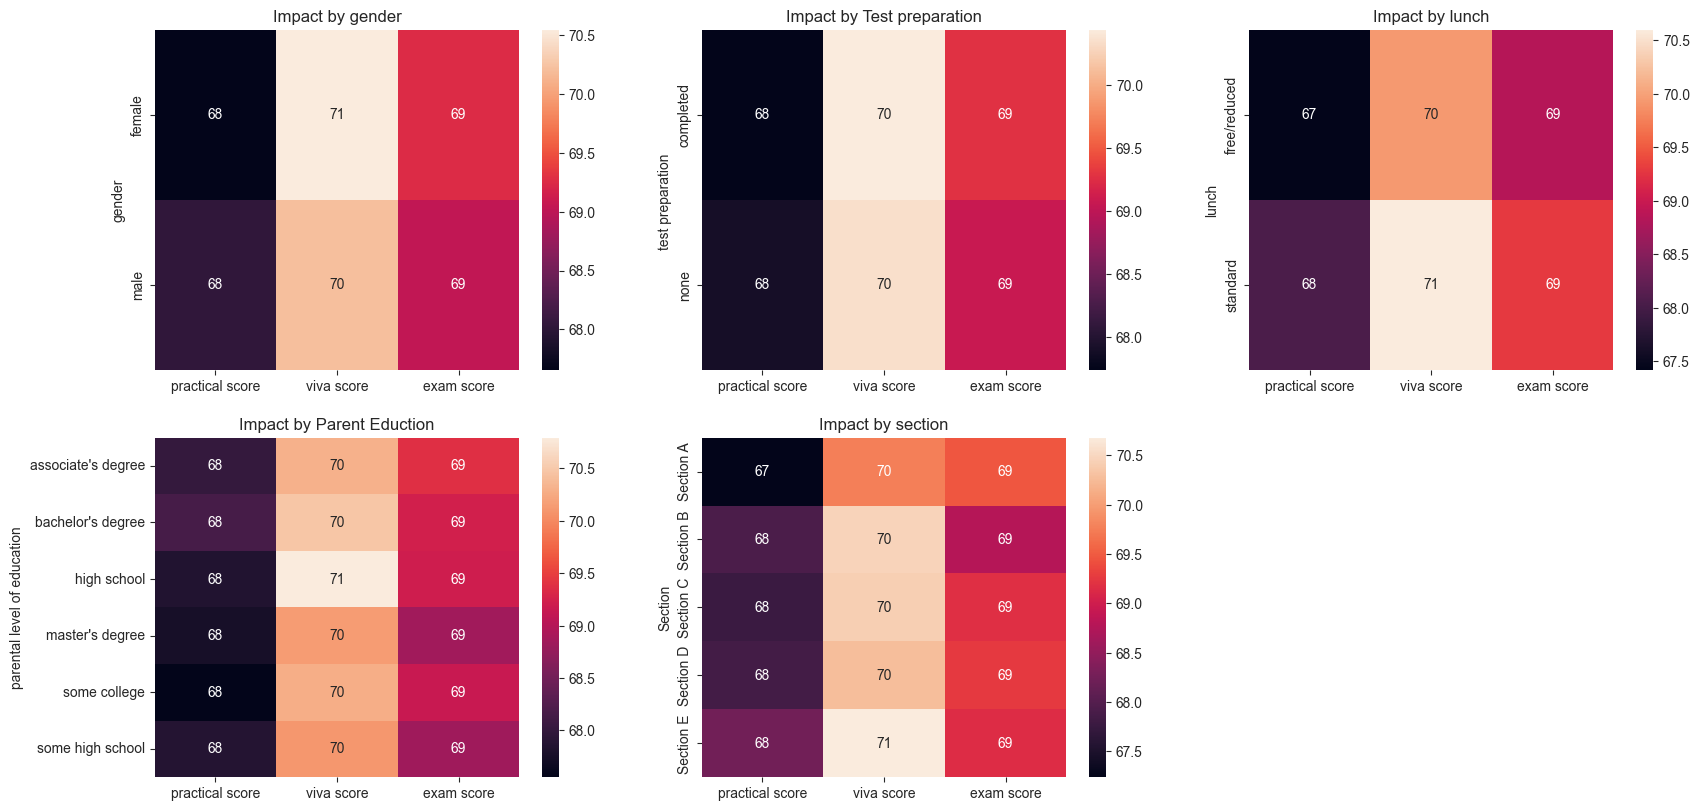

In [138]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.heatmap(gender, annot= True)
plt.title("Impact by gender")


plt.subplot(3,3,2)
sns.heatmap(test, annot= True)
plt.title("Impact by Test preparation")

plt.subplot(3,3,4)
sns.heatmap(parent, annot= True)
plt.title("Impact by Parent Eduction")

plt.subplot(3,3,3)
sns.heatmap(lunch, annot= True)
plt.title("Impact by lunch")

plt.subplot(3,3,5)
sns.heatmap(section, annot= True)
plt.title("Impact by section")

## Insights
1. The number of Male and Female students is almost equal.
2. The number of students is higher in Section C.
3. The number of students who have standard lunch is greater.
4. The number of students who have not enrolled in any test preparation course is greater.
5. The number of students whose parental education is “Some College” is     greater followed closely by “High school”.

## Student’s Performance is related to lunch, and Section.

1. males lead in pass percentage and also are top-scorers.
2. Student Performance is also effected by the lunch they are provided with as standard lunch provders show highest pass percentage.
3. Section C has the highest pass percentage and also the highest number of students.

# Multivarient Analysis

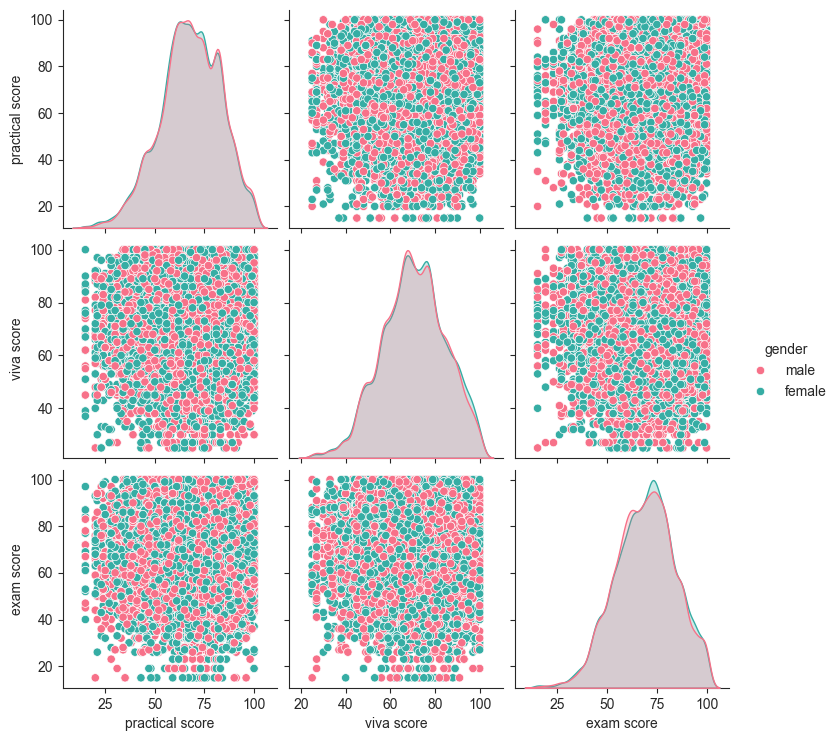

In [110]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'gender', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

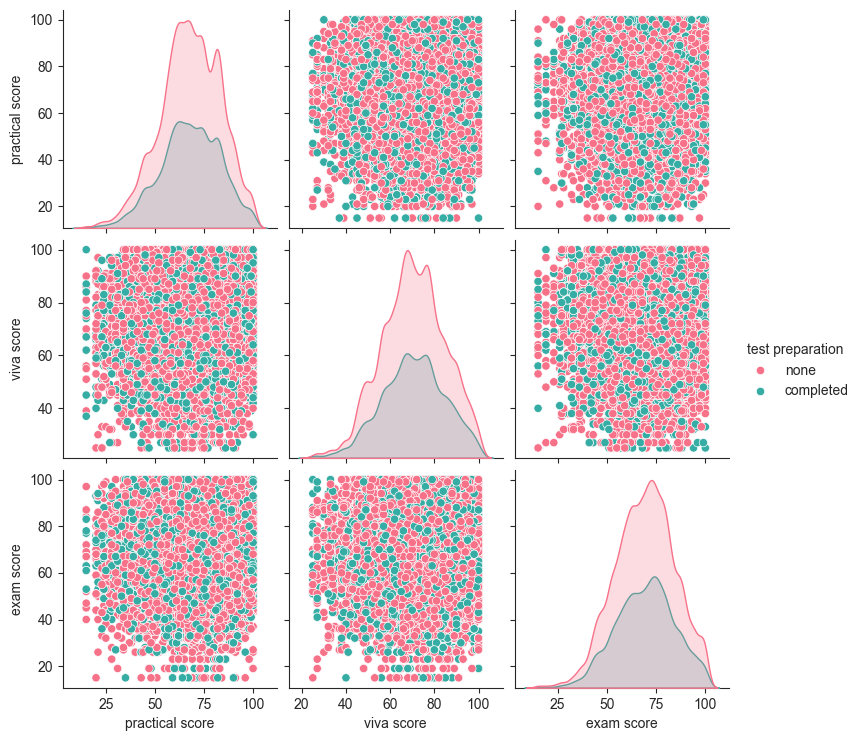

In [111]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'test preparation ', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

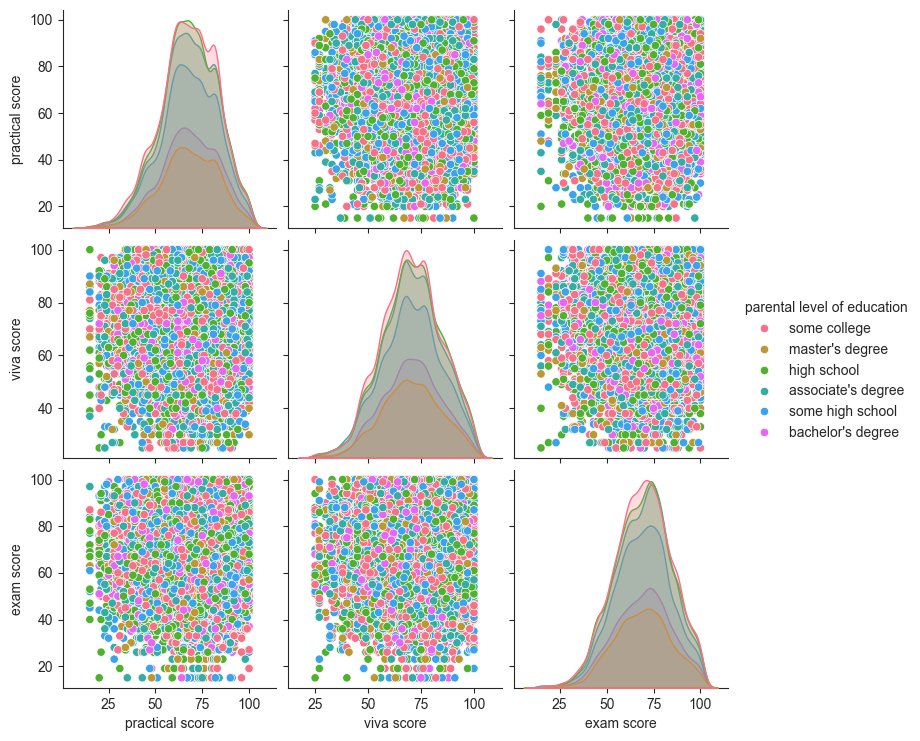

In [112]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'parental level of education', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

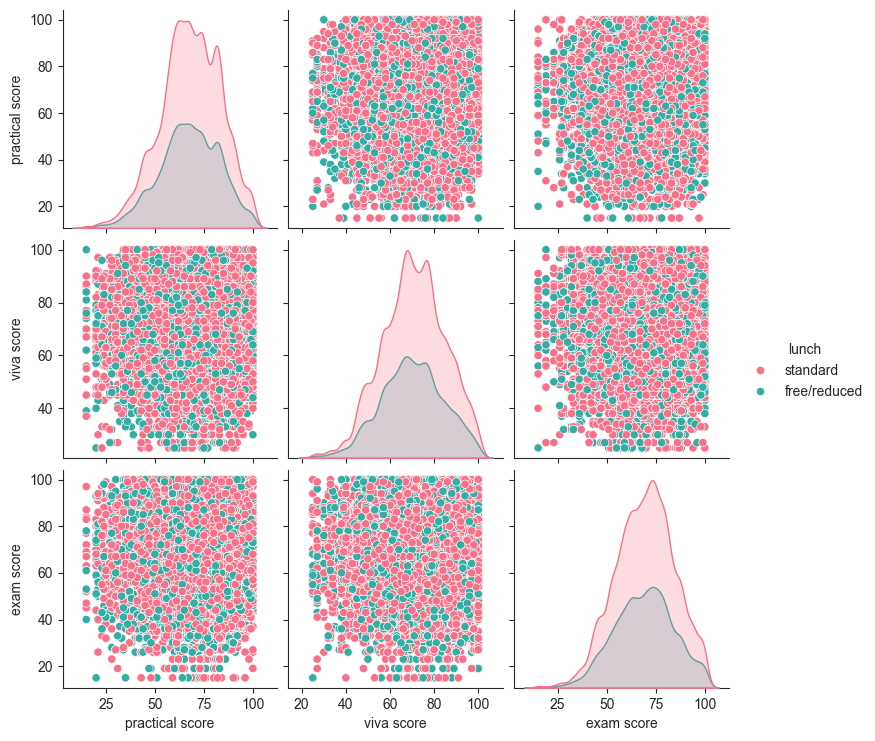

In [113]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'lunch', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

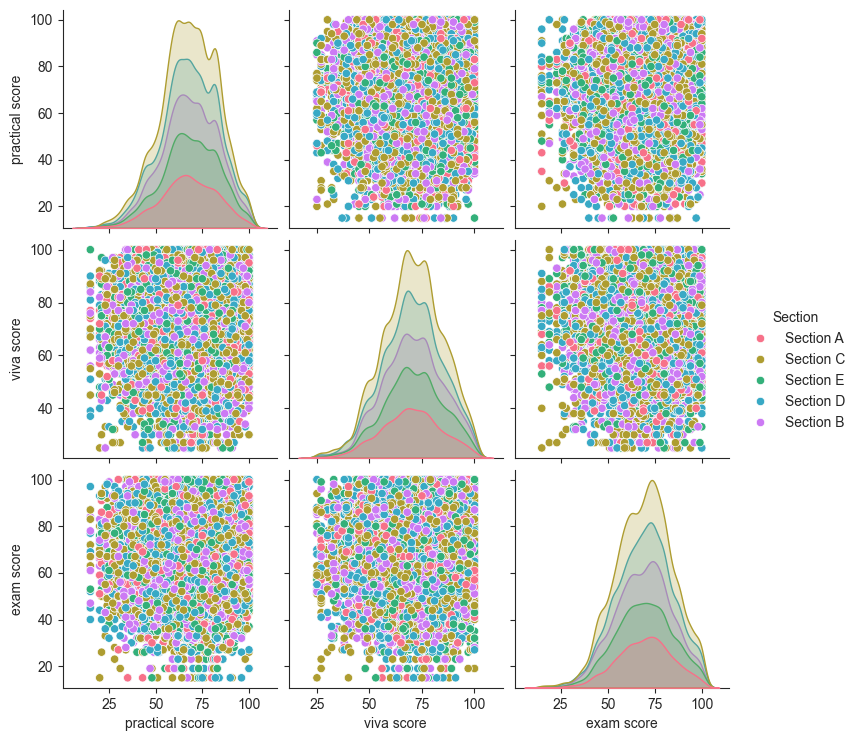

In [114]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'Section', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

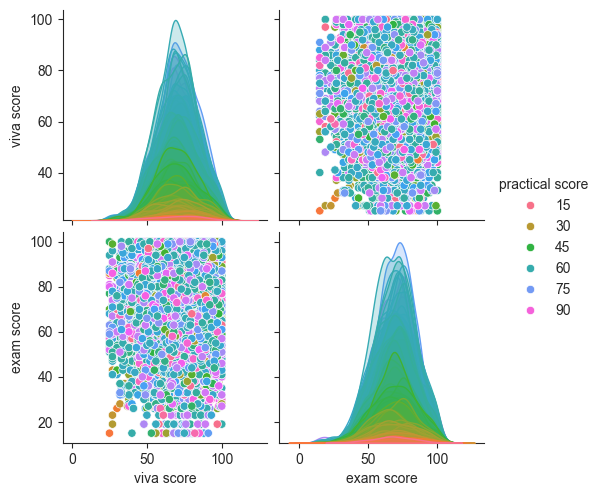

In [115]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'practical score', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

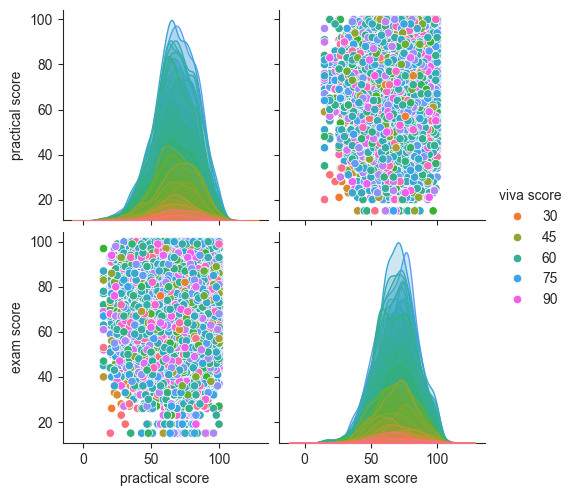

In [116]:
sns.set_style('ticks')
sns.pairplot(train, hue = 'viva score', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

# Insights
1. From the above analysis the exam score id effected by all the other parameters except gender in the provided information.
2. The practical score and the viva score show a linear relationship with the exam score

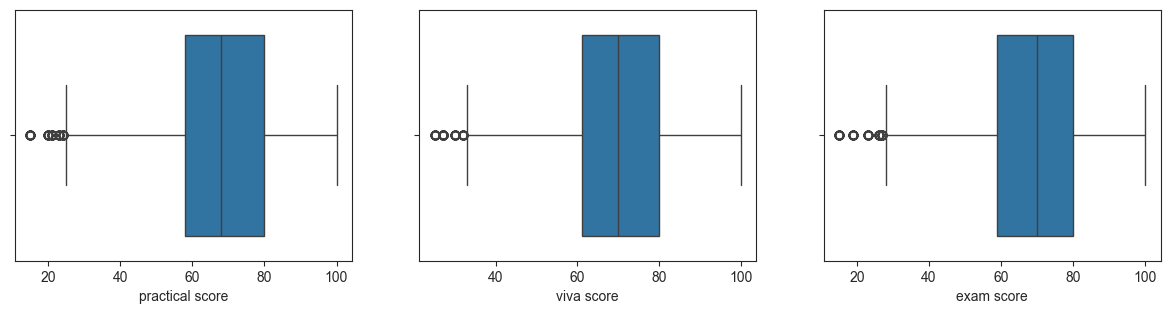

In [117]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data = train, x = 'practical score')

plt.subplot(4,4,2)
sns.boxplot(data = train, x = 'viva score')

plt.subplot(4,4,3)
sns.boxplot(data = train, x = 'exam score')
plt.savefig('boxplot.jpg')


In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
def label_encode(df, column):
    df = df.copy()
    column_label = LabelEncoder()
    df[column] = column_label.fit_transform(df[column])
    return df

In [120]:
def preprocess_inputs(df):
 # One-hot encode categorical features
    for column in ['Roll no','test preparation ', 'gender', 'parental level of education', 'lunch', 'Section']:
        df = label_encode(df, column)
    return df

In [121]:
X = preprocess_inputs(train)

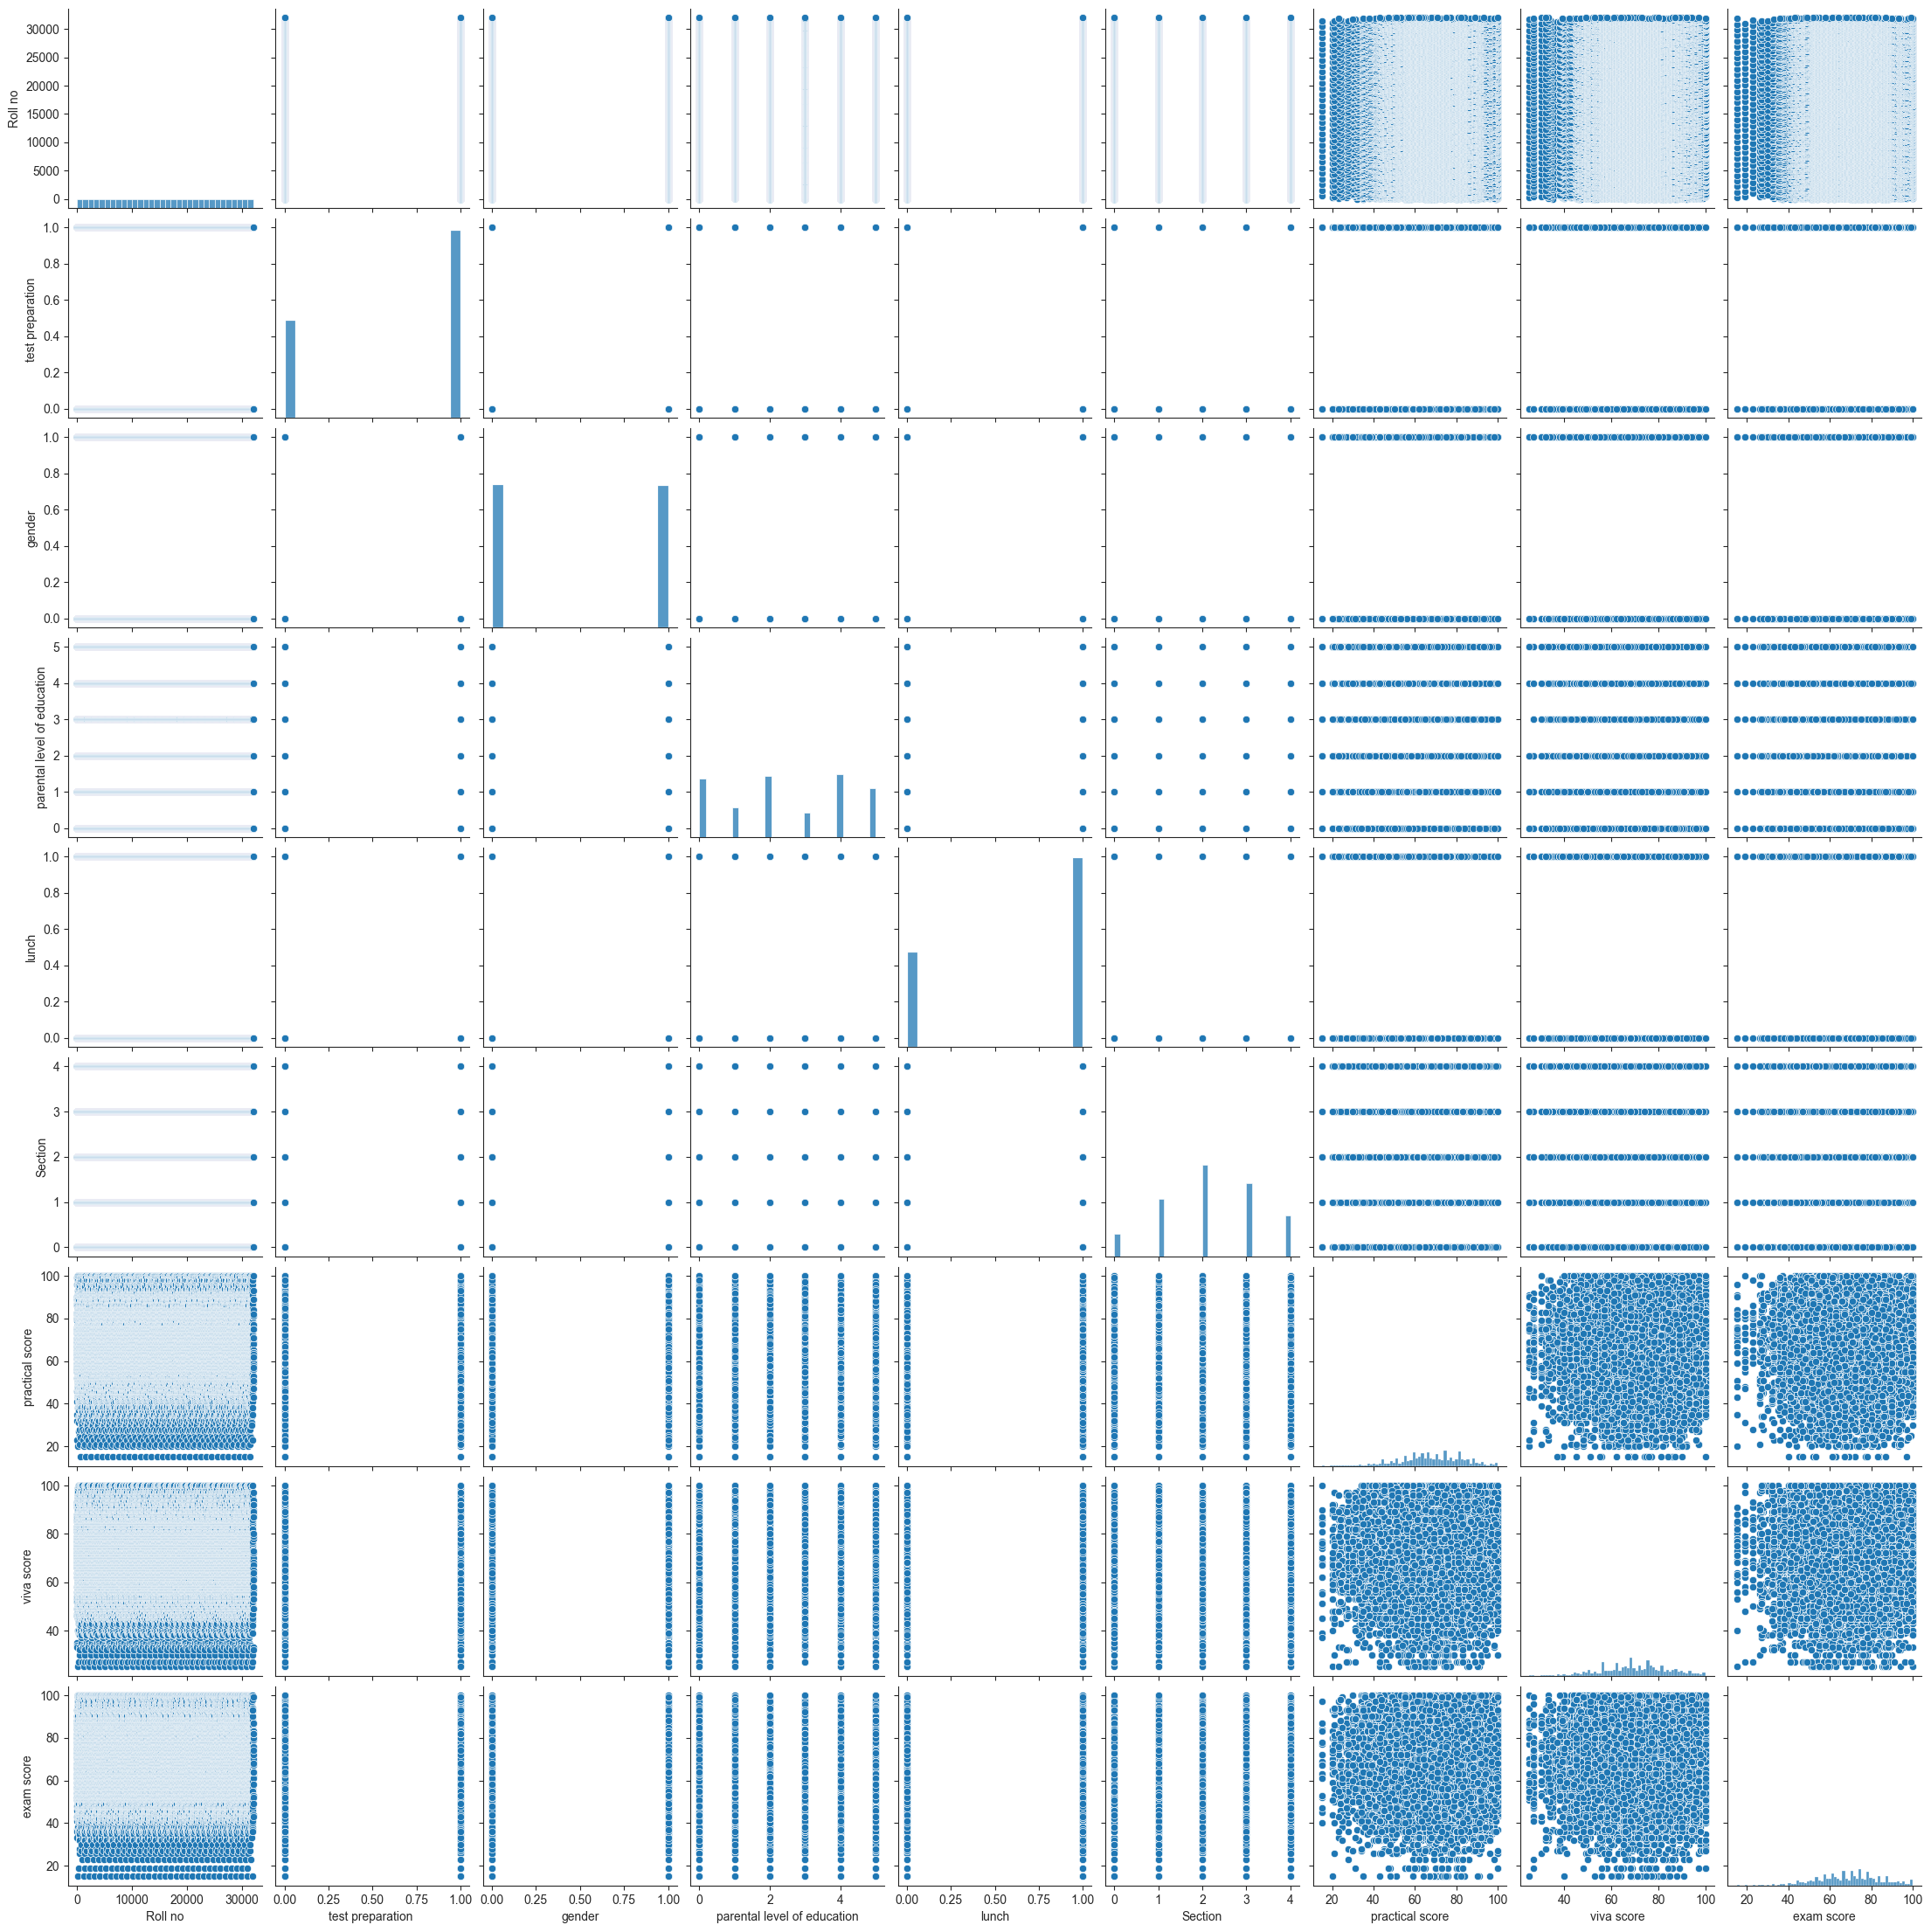

In [122]:
sns.pairplot(X)
plt.savefig('pairplot.jpg')